<a name="top"></a>

<div style="text-align: center;">
    <span style="font-family: 'Trebuchet MS', sans-serif; font-size: 36px;"><b>TUGAS CAPSTONE - MODUL 3</b>
    </span>
</div>

<div style="text-align: center;">
    <span style="font-family: 'Trebuchet MS', sans-serif; font-size: 26px;">
        <b>Regression Prediction Model<br>
            <i>California House Pricing</i></b>
         <br><p style="text-align: center;">oleh<br>Muhammad Abizar Algiffary Thahir<br>JCDS 2504-002</p>
    </span>
    </div>

### **Daftar Isi** <a name="contents"></a>
1. [Pendahuluan](#introduction)<br>
   1.1 [Latar Belakang](#background)<br>
   1.2 [Rumusan Masalah](#problem_statement)<br>
   1.3 [Tujuan Analisis](#goals)<br>
   1.4 [Pendekatan Analisis](#analytical_approach)<br>
   1.5 [Evaluasi Metrik](#evaluation_metrics)<br>
   1.6 [Batasan Analisis](#limitations)<br>   
2. [Pemahaman Data](#data_understanding)<br>
   2.1 [Deskripsi Data](#data_desc)<br>
   2.2 [Pembagian Data <i>Train-Test</i>](#train_test)<br>
   2.3 [Distribusi Data](#data_dist)<br>
   2.4 [Lokasi Geografis Data](#loc_geo_data)<br>
3. [Praproses Data](#data_preprocessing) <br>
   3.1 [Data Kosong](#miss_data)<br>
   3.2 [Data Dupilkat](#duplicates)<br>
   3.3 [Data Outlier](#outlier)<br>
   3.4 [Korelasi Fitur](#correlation)<br>
4. [Pembuatan Model](#modeling) <br>
   4.1 [<i>Feature Selection & Engineering</i>](#feat_select)<br>
   4.2 [Pembuatan <i>Benchmark Model</i>](#benchmark)<br>
   4.3 [Prediksi Test Data Menggunakan <i>Benchmark Model</i>](#bench_pred)<br>
   4.4 [<i>Hyperparameter Tuning</i>](#hyperparam)<br>
   4.5 [Prediksi Test Data Menggunakan <i>Tuned Model</i>](#tuned_pred)<br>
   4.6 [Perbandingan Performa Model](#comparison)<br>
   4.7 [Pembuatan <i>Final Model</i> dan <i>Save Model</i>](#final_save)<br>
   4.8 [<i>Feature Importance</i>](#feat_imp)<br>
   4.9 [Perbandingan Perhitungan Sederhana dengan <i>Machine Learning Regression</i>](#rule)<br>
   4.10 [Limitasi Model](#limitation)<br>
5. [Kesimpulan](#conclusion)
6. [Saran](#recommendation)

### **1. Pendahuluan** <a name="introduction"></a>

#### 1.1 Latar Belakang <a name="background"></a>

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>Pasar properti merupakan bagian yang dinamik dan penting dari ekonomi negara bagian California, memahami faktor yang mempengaruhi harga jual properti adalah wawasan kritikal untuk <i>stakeholder</i> seperti investor properti, developer properti, dan regulator properti. Dengan menggunakan data historis dari harga jual properti dan fitur yang berpengaruh lainnya, analisis ini bertujuan untuk mendapatkan wawasan tentang bagaimana berbagai faktor seperti lokasi, jarak dari pesisir, densitas populasi, dan median pendapatan mempengaruhi median harga jual properti</p>
    <p></p>
    </div>

#### 1.2 Rumusan Masalah <a name="problem_statement"></a>

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>Permasalahan utama adalah menentukan median harga jual properti di California berdasarkan berbagai fitur seperti lokasi geografis, usia properti, jumlah kamar, populasi, dan jarak dari pesisir yang masih menggunakan perhitungan manual. Dengan adanya variasi dalam faktor-faktor ini di seluruh California, terdapat kebutuhan akan model <i>machine learning</i> yang dapat diandalkan dalam memprediksi harga jual properti secara akurat dan membantu pengambilan keputusan.</p>
    <p></p>
    </div>

#### 1.3 Tujuan Analisis <a name="goals"></a>

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <ol style="list-style-type: lower-alpha">
      <li><b>Memahami hubungan</b> dari harga properti dan berbagai faktor lainnya (jarak dari pesisir, median
          pendapatan, jumlah kamar, dsb.);</li>
      <li><b>Membangun model prediktif</b> untuk memperkirakan median harga jual properti berdasarkan fitur data
          historis;
      </li>
      <li><b>Mengidentifikasi faktor utama</b> dari penentuan median harga jual properti;
      </li>
      <li><b>Memberi wawasan</b> yang dapat diimplementasikan dalam memandu investasi properti, rencana pembangunan,
          dan penentuan harga jual.
      </li>  
    </ol>
   </div>

#### 1.4 Pendekatan Analisis <a name="analytical_approach"></a>

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <ol style="list-style-type: lower-alpha">
      <li><b>Pemahaman dan praproses data:</b>
          <ul>
              <li>Menampilkan dan membuat statistik deskriptif dataset.
              </li>
              <li>Mengatasi data kosong pada fitur <mark style="background-color: lightgray";>total_bedrooms</mark>, dan mengatasi data duplikat, serta data outlier.
              </li>
              <li>Memahami distribusi dan korelasi fitur.
              </li>
          </ul>
          </li><br>
      <li><b>Pemilihan fitur:</b>
          <ul>
              <li>Evaluasi fitur-fitur yang akan digunakan dalam <i>training model</i>
              </li>
              <li>Memilih fitur berdasarkan hasil dari pemahaman dataset.</li>
          </ul>
      </li><br>
      <li><b>Pemilihan dan pelatihan model:</b>
      <ul>
              <li>Mengaplikasikan beberapa model <i>machine learning</i> seperti
                  <mark style="background-color: lightgray";><i>Lasso, Ridge, Linear Regression, K-Nearest Neighbor, Decision Tree, SVM, Random Forest, XGBoost, LightGBM, dan CatBoost</i>.</mark> dalam memprediksi harga jual properti.
              <li>Memilih <i>benchmark model</i> terbaik untuk memprediksi data test.
              </li>
              </li>
              <li>Menggunakan <i>RandomSearchCV</i> untuk melakukan <i>Hyperparameter Tuning Model</i>.
              </li>
          </ul>
      </li><br>
      <li><b>Evaluasi and Interpretasi:</b>
          <ul>
              <li>Mengevaluasi performa model menggunakan beberapa metode pengukuran seperti: <br>
                  <i>Mean Absolute Error (MAE)</i>, <i>Mean Absolute Percentage Error (MAPE)</i>, <i>Root Mean Squared Error (RMSE)</i>,
                  dan <i>R-Squared (R<sup>2</sup>)</i>.
              </li>
              <li>Menganalisis hasil performa model sesudah melakukan <i>tuning</i>.
              </li>
              <li>Membandingkan hasil performa model sebelum dan sesudah melakukan <i>tuning</i>.
              </li>
              <li>Menganalisis <i>Feature Importance</i>.
              </li>
              <li>Membandingkan prediksi model dengan perhitungan perkiraan sederhana.
              </li>
          </ul>
      </li>  
    </ol>
   </div>

#### 1.5 Evaluasi Metrik <a name="evaluation_metrics"></a>

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
  <p>Evaluasi metrik utama yang akan digunakan adalah:</p>
   <ul>
      <li><b>Mean Absolute  Error (MAE):</b> menghitung rata-rata nilai error dari prediksi harga jual dengan harga jual properti aktual.<br>Metrik ini mendeskripsikan seberapa besar kesalahan  model dalam memprediksi nilai kontinu atau dikenal dengan sebutan error.
      </li><br>
      <li><b>Mean Absolute Percentage Error (MAPE): </b>menghitung rata-rata nilai error dari prediksi harga jual dengan harga jual properti aktual dengan hasil perhitungan dalam persentase.
      </li><br>
      <li><b>Root Mean Squared Error (RMSE):</b> menghitung nilai standar deviasi dari kesalahan prediksi, dengan pembobotan lebih tinggi pada selisih nilai error yang besar.<br>Metrik ini mendeskripsikan seberapa besar kesalahan model dalam memprediksi nilai kontinu dengan mengurangi efek kuadrat dari MSE.
      </li><br>
      <li><b>R-Squared (R<sup>2</sup>):</b> mengukur variani dalam label sasaran yang dapat dijelaskan oleh fitur pada model.<br>Nilai R-Squared berkisar antara 0 dan 1, dimana nilai semakin mendekati 1 menunjukkan bahwa model semakin dapat menjelaskan semua variansi dalam data alias semakin baik.
   </ul><br>
  <p>Metode-metode pengukuran ini akan membantu dalam menilai akurasi dan kehandalan model-model <i>machine learning</i> dalam memprediksi harga jual properti.</p>
  </div>

#### 1.6 Batasan Analisis <a name="limitations"></a>

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>Ruang lingkup dari analisis ini meliputi analisis data, interpretasi diagram, dan pembuatan model <i>machine learning</i> data historis harga jual properti. Batasan-batasan awal yang digunakan dalam analisis ini adalah:</p>
    <ol>
      <li>Cakupan wilayah yang digunakan hanya pada wilayah di negara bagian California.</li>
      <li>Data yang digunakan merupakan kumpulan data statistik dan sensus pada tahun 1990.</li>
      <li>Dataset yang digunakan hanya memiliki 10 fitur informasi.</li>  
    </ol>
   </div>

#### [Kembali ke Daftar Isi](#contents)

### **2. Pemahaman Data** <a name="data_understanding"></a>

#### 2.1 Deskripsi Data <a name="data_desc"></a>

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>Data yang akan dianalisis mengandung kumpulan data statistik harga jual properti dan sensus populasi pada tahun 1990 di California.
    Data ini pertama kali dipublikasikan dalam artikel:
    <br>
    <br>
    <i>Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.</i>
    </p>
    </div>

[Sumber Dataset](https://drive.google.com/drive/folders/19YA_f36uGR86hTnZuX-Ech59s3AFzXXo)

<div>
    <p style="text-align: center;"><b>Tabel Fitur dan Deskripsi Data Historis Harga Jual Properti California</b></p>
    <table>
      <thead>
        <tr>
          <th>Fitur</th>
          <th style="text-align:left;">Deskripsi</th>
          <th>Tipe dan Kategori data</th>
        </tr>
      </thead>
      <tbody>
        <tr>
          <td><b>Longitude</b></td>
          <td>Koordinat geografis garis bujur.</td>
          <td>Numerical-Continuous</td>
        </tr>
        <tr>
          <td><b>Latitude</b></td>
          <td>Koordinat geografis garis lintang.</td>
          <td>Numerical-Continuous</td>
        </tr>
        <tr>
          <td><b>housing_median_age</b></td>
          <td>Median usia properti di daerah tersebut.</td>
          <td>Numerical-Discrete</td>
        </tr>
        <tr>
          <td><b>total_rooms</b></td>
          <td>Jumlah ruangan dalam properti di daerah tersebut.</td>
          <td>Numerical-Discrete</td>
        </tr>
        <tr>
          <td><b>total_bedrooms</b></td>
          <td>Jumlah kamar tidur dalam properti di daerah tersebut.</td>
          <td>Numerical-Discrete</td>
        </tr>
        <tr>
          <td><b>population</b></td>
          <td>Sensus penduduk yang bermukim di daerah tersebut.</td>
          <td>Numerical-Discrete</td>
        </tr>
        <tr>
          <td><b>households</b></td>
          <td>Sensus jumlah rumah tangga yang terdapat di daerah tersebut.</td>
          <td>Numerical-Discrete</td>
        </tr>
        <tr>
          <td><b>median_income</b></td>
          <td>Median pendapatan di daerah tersebut.</td>
          <td>Numerical-Continuous</td>
        </tr>
        <tr>
          <td><b>ocean_proximity</b></td>
          <td>Jarak daerah tersebut dari pesisir.</td>
          <td>Categorical-Ordinal</td>
        </tr>
        <tr>
          <td><b>median_house_value</b></td>
          <td>Median harga jual properti di daerah tersebut.</td>
          <td>Numerical-Continuous</td>
        </tr>
      </tbody>
    </table>
</div>

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>Karena mayoritas data merupakan numerikal, maka analisis akan menggunakan model regresi.</i>
    </p>
    </div>

In [ ]:
# pip install catboost --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.4 MB/s eta 0:00:00


In [ ]:
# import modul
# modul utama
import pandas as pd
import numpy as np

# modul visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# modul statistika
from scipy import stats
from scipy.stats import normaltest

# modul untuk imputer
from sklearn.impute import SimpleImputer, KNNImputer

# modul Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor

# modul split tuning parameter, & cross validasi
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold,GridSearchCV, RandomizedSearchCV, KFold

# modul machine learning
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import pickle

# modul metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# modul feature selection
from sklearn.feature_selection import SelectPercentile, SelectKBest,f_regression, f_classif

# modul untuk pipeline
from sklearn.pipeline import Pipeline

# modul warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load dataset
# data=pd.read_csv('drive/MyDrive/Colab Notebooks/data_california_house.csv')
data=pd.read_csv('data_california_house.csv')
df=data.copy()
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.79     36.73                52.0        112.0            28.0   
1    -122.21     37.77                43.0       1017.0           328.0   
2    -118.04     33.87                17.0       2358.0           396.0   
3    -118.28     34.06                17.0       2518.0          1196.0   
4    -119.81     36.73                50.0        772.0           194.0   

   population  households  median_income ocean_proximity  median_house_value  
0       193.0        40.0         1.9750          INLAND             47500.0  
1       836.0       277.0         2.2604        NEAR BAY            100000.0  
2      1387.0       364.0         6.2990       <1H OCEAN            285800.0  
3      3051.0      1000.0         1.7199       <1H OCEAN            175000.0  
4       606.0       167.0         2.2206          INLAND             59200.0

#### 2.2 Pembagian Data <i>Train-Test</i> <a name="train_test"></a>

In [ ]:
# menentukan fitur dan label
X=df.drop(['median_house_value'], axis=1)
y=df['median_house_value']

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8492)

# concate dataframe train dan test
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

print(f'Jumlah data train: {X_train.shape[0]}')
print(f'Jumlah data test: {X_test.shape[0]}')

Jumlah data train: 10113
Jumlah data test: 4335


<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>Pembagian data <i>train-test</i> dilakukan di awal sebelum memproses data untuk meminimalisir terjadinya kebocoran data <i>train</i>, disebut juga sebagai <i>training leakage</i> .
    </p>
    </div>

In [ ]:
df_train.describe(include='all')

longitude      latitude  housing_median_age   total_rooms  \
count   10113.000000  10113.000000        10113.000000  10113.000000   
unique           NaN           NaN                 NaN           NaN   
top              NaN           NaN                 NaN           NaN   
freq             NaN           NaN                 NaN           NaN   
mean     -119.561651     35.630180           28.631860   2631.898250   
std         2.007744      2.142624           12.621594   2165.991349   
min      -124.350000     32.540000            1.000000      2.000000   
25%      -121.790000     33.930000           18.000000   1451.000000   
50%      -118.490000     34.260000           29.000000   2126.000000   
75%      -118.000000     37.710000           37.000000   3123.000000   
max      -114.310000     41.950000           52.000000  32627.000000   

        total_bedrooms    population    households  median_income  \
count     10012.000000  10113.000000  10113.000000   10113.000000   
unique             NaN           NaN           NaN            NaN   
top                NaN           NaN           NaN            NaN   
freq               NaN           NaN           NaN            NaN   
mean        536.602477   1421.435182    497.465342       3.863293   
std         420.845157   1111.314885    379.283001       1.901970   
min           1.000000      3.000000      1.000000       0.499900   
25%         295.000000    785.000000    278.000000       2.562500   
50%         435.000000   1164.000000    409.000000       3.533100   
75%         646.000000   1725.000000    604.000000       4.726900   
max        6445.000000  28566.000000   6082.000000      15.000100   

       ocean_proximity  median_house_value  
count            10113        10113.000000  
unique               5                 NaN  
top          <1H OCEAN                 NaN  
freq              4410                 NaN  
mean               NaN       206555.550282  
std                NaN       115743.606301  
min                NaN        14999.000000  
25%                NaN       118800.000000  
50%                NaN       179200.000000  
75%                NaN       263900.000000  
max                NaN       500001.000000

In [ ]:
# melihat jumlah dan tipe data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10113 entries, 3077 to 5361
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           10113 non-null  float64
 1   latitude            10113 non-null  float64
 2   housing_median_age  10113 non-null  float64
 3   total_rooms         10113 non-null  float64
 4   total_bedrooms      10012 non-null  float64
 5   population          10113 non-null  float64
 6   households          10113 non-null  float64
 7   median_income       10113 non-null  float64
 8   ocean_proximity     10113 non-null  object 
 9   median_house_value  10113 non-null  float64
dtypes: float64(9), object(1)
memory usage: 869.1+ KB


<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>Berdasarkan informasi dari dataset terdapat data kosong pada fitur <mark style="background-color: lightgray";>total_bedrooms</mark>.
    </p>
    </div>

ocean_proximity
<1H OCEAN     4410
INLAND        3245
NEAR OCEAN    1319
NEAR BAY      1138
ISLAND           1
Name: count, dtype: int64

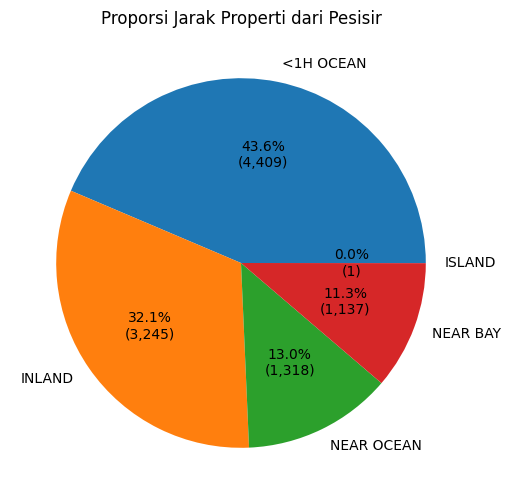

In [ ]:
# melihat jumlah data kategorikal
df_ocean=df_train['ocean_proximity'].value_counts()
display(df_ocean)

# sort descending
sort_ocean=df_train.groupby('ocean_proximity').size().sort_values().index[::-1]

# membuat pie chart
plt.figure(figsize=(6,6))
df_train['ocean_proximity'].value_counts().plot(kind='pie',
        autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*df_train["ocean_proximity"].value_counts().sum()):,})')
plt.title('Proporsi Jarak Properti dari Pesisir')
plt.ylabel('')
# plt.savefig("pie_ocean1.png", dpi=300, bbox_inches='tight')
plt.show()

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>Berdasarkan informasi dari fitur kategorik <mark style="background-color: lightgray";>ocean_proximity</mark> properti-properti di wilayah California yang berada kurang dari 1 jam jarak tempuh dari pesisir ( <mark style="background-color: lightgray";><1H OCEAN</mark> ) memiliki proporsi yang tinggi senilai <b>44.6%</b>, properti yang berada dalam daratan ( <mark style="background-color: lightgray";>INLAND</mark> ) senilai <b>31.3%</b>, properti yang berada dekat laut ( <mark style="background-color: lightgray";>NEAR OCEAN</mark> ) senilai <b>12.9%</b>, dan properti yang berada dekat teluk ( <mark style="background-color: lightgray";>NEAR BAY</mark> ) senilai <b>11.3%</b>,
        </p>
            </div>

#### 2.3 Distribusi Data <a name="data_dist"></a>

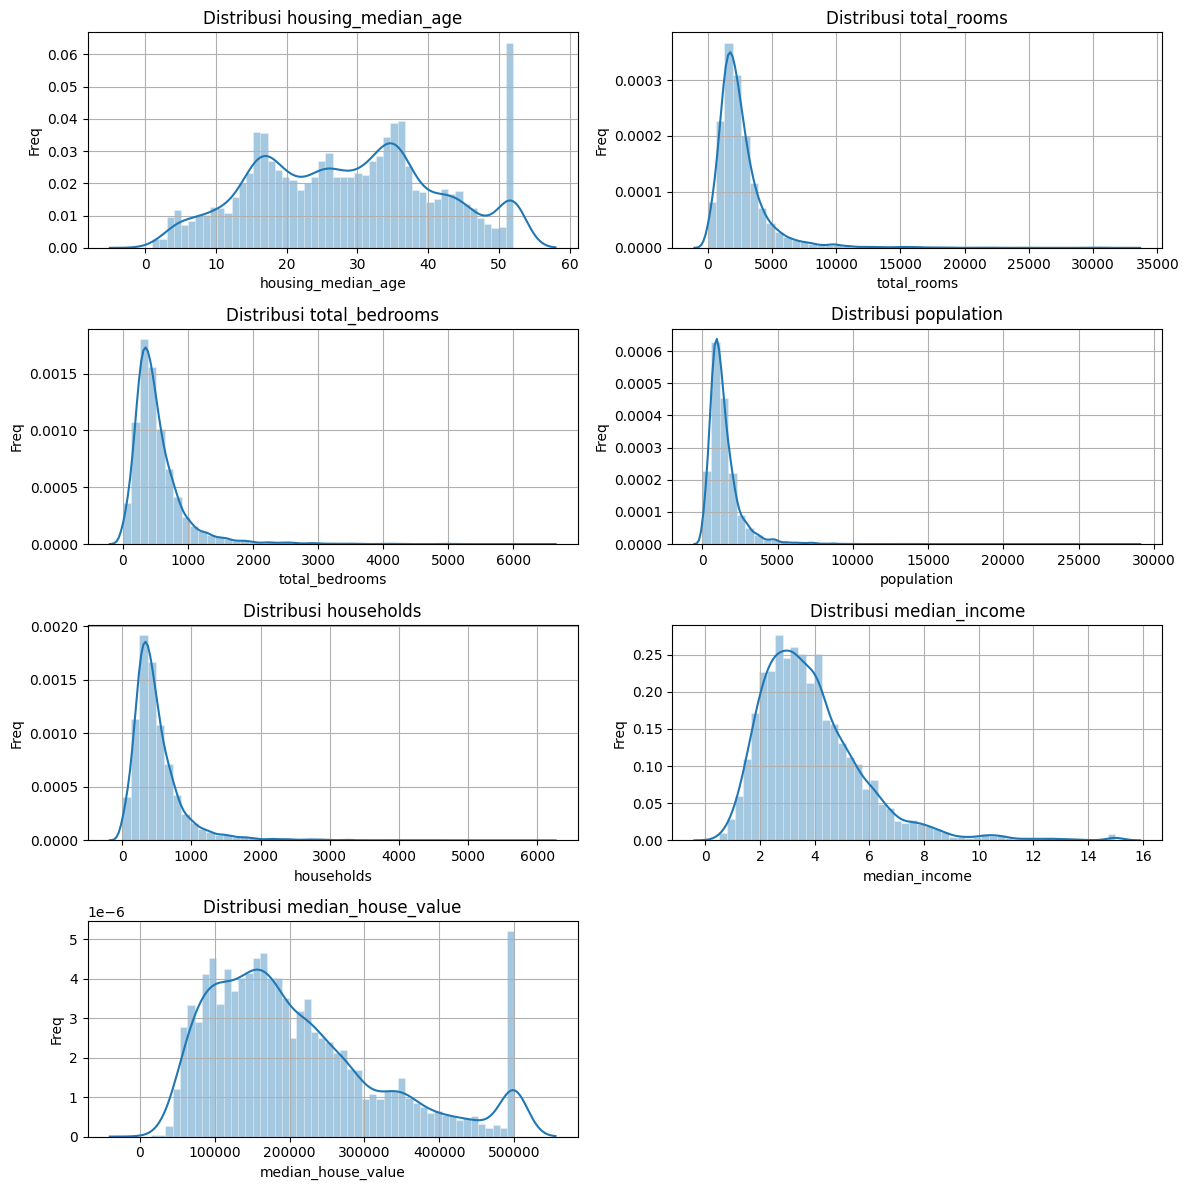

In [ ]:
# membuat histogram
num_cols = ['housing_median_age', 'total_rooms', 'total_bedrooms',
                     'population', 'households', 'median_income', 'median_house_value']

fig, axs = plt.subplots(4, 2, figsize=(12, 12))
axs = axs.ravel()

for idx, col in enumerate(num_cols):
    sns.histplot(df_train[col], bins=50,  kde=True, stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4), ax=axs[idx],)
    axs[idx].set_title(f'Distribusi {col}')
    axs[idx].set_xlabel(col)
    axs[idx].set_ylabel('Freq')
    axs[idx].grid(True)

# hapus subplot kosong
axs[-1].axis('off')

plt.tight_layout()
# plt.savefig("histplot1.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# melihat statistik deskriptif data keseluruhan
df_train.describe(include='number')

longitude      latitude  housing_median_age   total_rooms  \
count  10113.000000  10113.000000        10113.000000  10113.000000   
mean    -119.561651     35.630180           28.631860   2631.898250   
std        2.007744      2.142624           12.621594   2165.991349   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.790000     33.930000           18.000000   1451.000000   
50%     -118.490000     34.260000           29.000000   2126.000000   
75%     -118.000000     37.710000           37.000000   3123.000000   
max     -114.310000     41.950000           52.000000  32627.000000   

       total_bedrooms    population    households  median_income  \
count    10012.000000  10113.000000  10113.000000   10113.000000   
mean       536.602477   1421.435182    497.465342       3.863293   
std        420.845157   1111.314885    379.283001       1.901970   
min          1.000000      3.000000      1.000000       0.499900   
25%        295.000000    785.000000    278.000000       2.562500   
50%        435.000000   1164.000000    409.000000       3.533100   
75%        646.000000   1725.000000    604.000000       4.726900   
max       6445.000000  28566.000000   6082.000000      15.000100   

       median_house_value  
count        10113.000000  
mean        206555.550282  
std         115743.606301  
min          14999.000000  
25%         118800.000000  
50%         179200.000000  
75%         263900.000000  
max         500001.000000

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>Berdasarkan histogram dari fitur-fitur dataset, distribusi data tampak memiliki <i>positive skew</i> atau nilai outlier positif yang tinggi. Pada fitur <mark style="background-color: lightgray";>housing_median_age : <b>max=52</b></mark>, <mark style="background-color: lightgray";>median_income : <b>max=15.0001</b></mark> dan <mark style="background-color: lightgray";>median_house_value : <b>max=500,001</b></mark> terdapat memiliki batas maksimum atau <i>capped</i> (terdapat nilai yang berkumpul pada nilai tertinggi ).
    </p>
    </div>

#### 2.4 Lokasi Geografis Data <a name="loc_geo_data"></a>

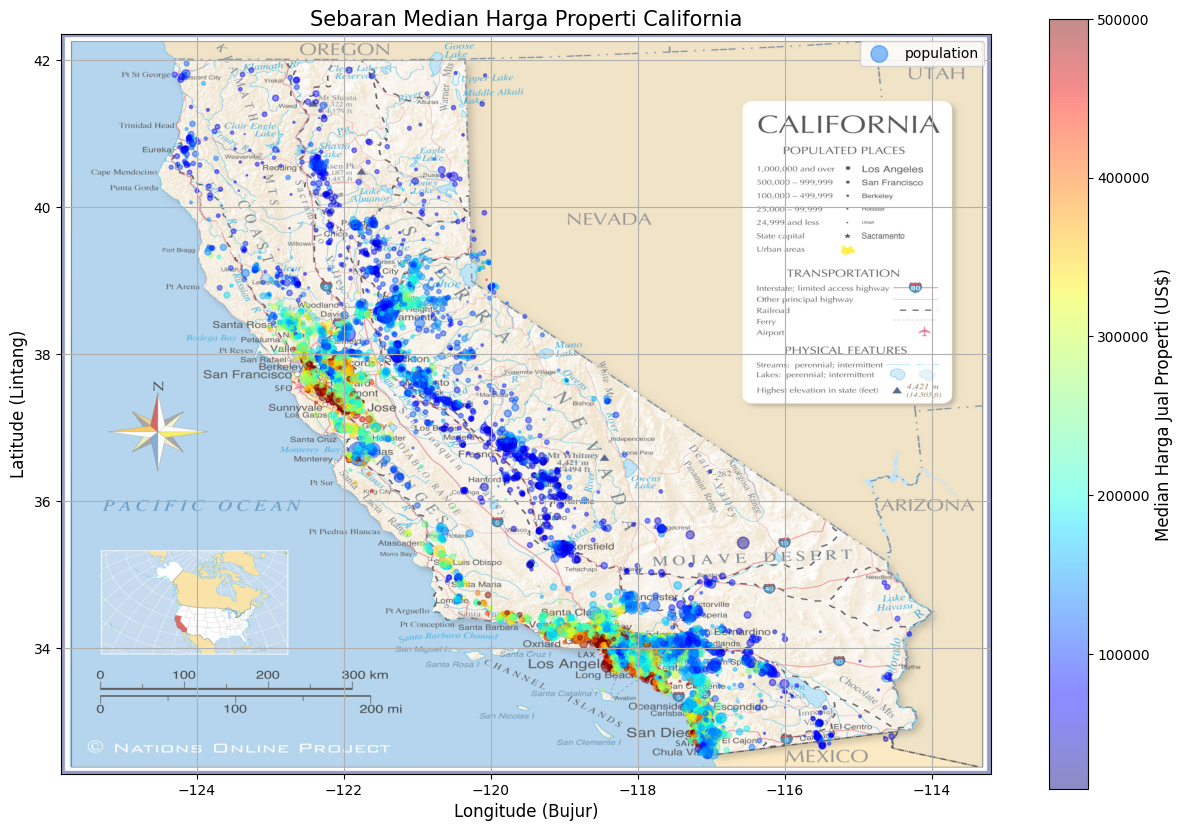

In [ ]:
# melihat sebaran geografis data median_house_value
# california_img = plt.imread('/content/drive/MyDrive/Colab Notebooks/California_map.jpg')
california_img = plt.imread('California_map.jpg')
scatter=df_train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.45,
        s=df_train['population']/100, label='population', figsize=(15,10),
        c='median_house_value',cmap=plt.get_cmap('jet'), colorbar=False)
cbar = scatter.get_figure().colorbar(scatter.collections[0])
cbar.set_label('Median Harga Jual Properti (US$)', fontsize=12)

plt.imshow(california_img,
           aspect='equal',origin='upper',extent=[-125.85, -113.20, 32.29, 42.35],alpha=0.75)
plt.title('Sebaran Median Harga Properti California',fontsize=15)
plt.xlabel('Longitude (Bujur)', fontsize=12)
plt.ylabel('Latitude (Lintang)', fontsize=12)
plt.grid()
plt.legend()
# plt.savefig("map_median_price1.png", dpi=300, bbox_inches='tight')
plt.show()

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>Berdasarkan dari sebaran data secara geografis, tampak bahwa sebaran median harga jual properti yang tinggi berkumpul pada kota-kota besar di daerah pesisir California, seperti San Diego, San Francisco, dan Los Angeles. Fitur kategorik <mark style="background-color: lightgray";>ocean_proximity</mark> memiliki kesamaan dengan fitur <mark style="background-color: lightgray";>longitude</mark> dan  <mark style="background-color: lightgray";>latitude</mark>, akan tetapi fitur numerik memberikan lokasi yang lebih spesifik daripada fitur kategoriknya, maka fitur <mark style="background-color: lightgray";>ocean_proximity</mark> tidak digunakan dalam model <i>machine learning</i>.
    </p>
    </div>

#### [Kembali ke Daftar Isi](#contents)

### **3. Praproses data** <a name="data_preprocessing"></a>

#### 3.1 Data Kosong <a name="miss_data"></a>

In [ ]:
# check data kosong dan persentase
na_val=df_train.isna().sum()
na_perc=100*df_train.isna().sum()/len(df_train)
check_na=pd.DataFrame({
    'Missing Values':na_val,
    'Percentage':na_perc.round(2).astype(str)+'%'
})
check_na = check_na.sort_values('Missing Values', ascending=False)
display(check_na)

Missing Values Percentage
total_bedrooms                 101       1.0%
longitude                        0       0.0%
latitude                         0       0.0%
housing_median_age               0       0.0%
total_rooms                      0       0.0%
population                       0       0.0%
households                       0       0.0%
median_income                    0       0.0%
ocean_proximity                  0       0.0%
median_house_value               0       0.0%

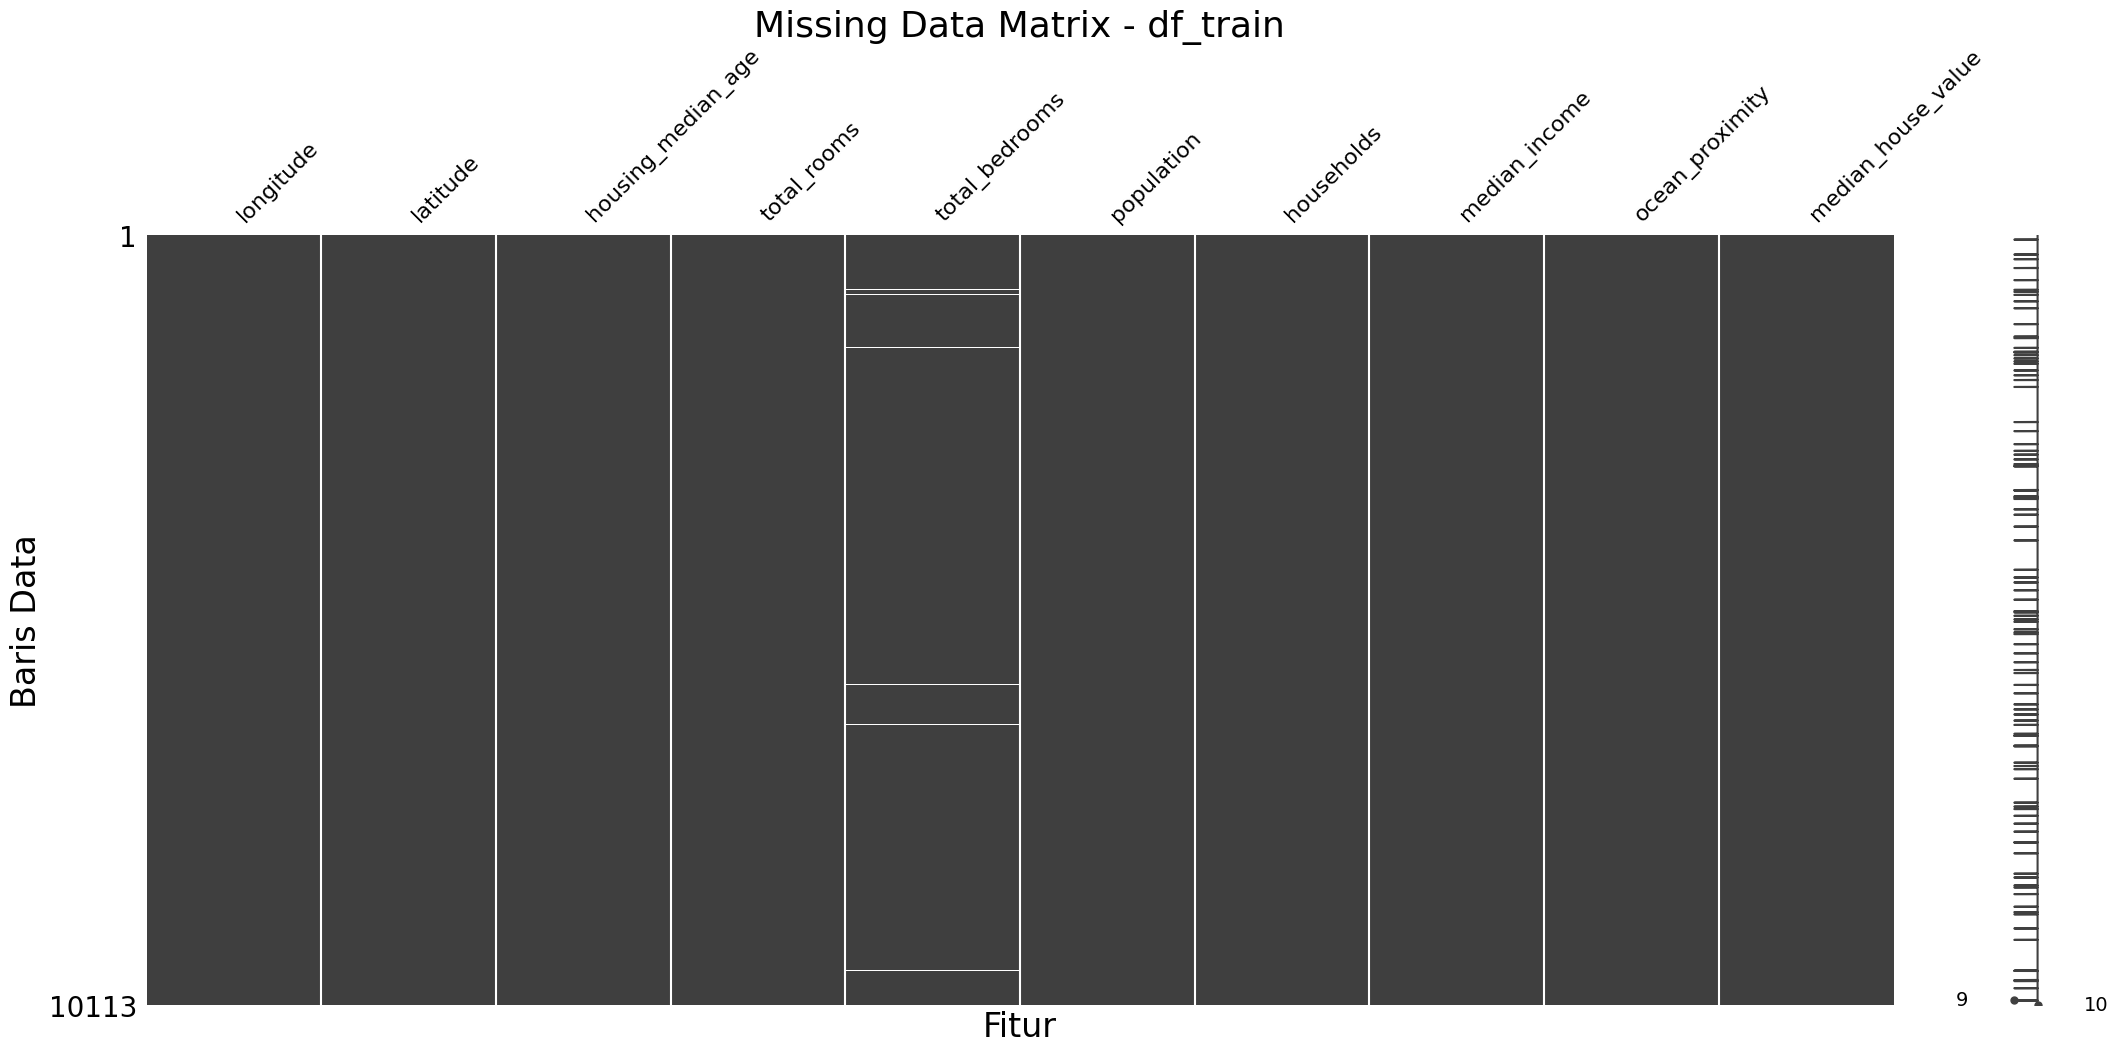

In [ ]:
msno.matrix(df_train)
plt.title('Missing Data Matrix - df_train', fontsize=26)
plt.xlabel('Fitur', fontsize=24,)
plt.ylabel('Baris Data', fontsize=24)
# plt.savefig("miss_matrix1.png", dpi=300, bbox_inches='tight')
plt.show()

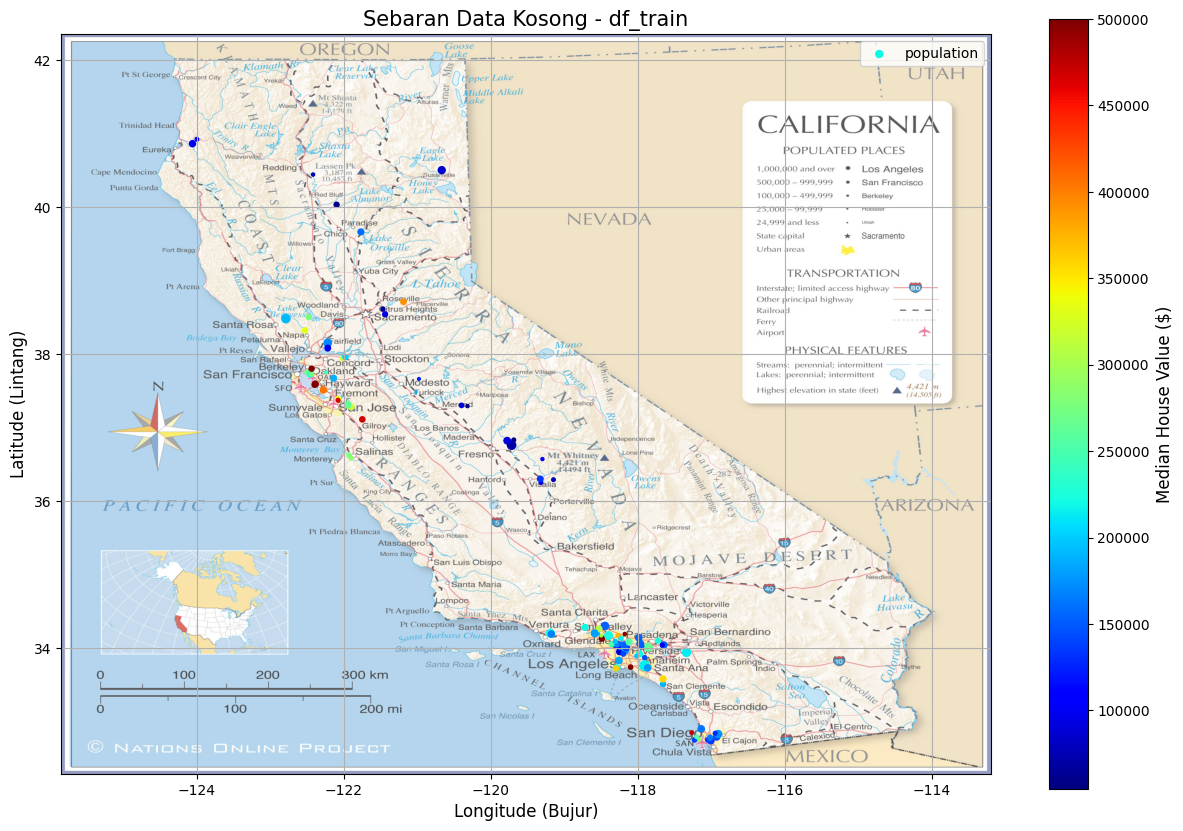

In [ ]:
# melihat sebaran geografis data kosong
df_na=df_train.loc[df_train['total_bedrooms'].isna()]
# california_img = plt.imread('/content/drive/MyDrive/Colab Notebooks/California_map.jpg')
california_img = plt.imread('California_map.jpg')
scatter_na=df_na.plot(kind='scatter', x='longitude', y='latitude', alpha=1,
        s=df_na['population']/100, label='population', figsize=(15,10),
        c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=False)
cbar = scatter_na.get_figure().colorbar(scatter_na.collections[0])
cbar.set_label('Median House Value ($)', fontsize=12)

plt.imshow(california_img,
           aspect='equal',origin='upper',extent=[-125.85, -113.20, 32.29, 42.35],alpha=0.75)
plt.title('Sebaran Data Kosong - df_train',fontsize=15)
plt.xlabel('Longitude (Bujur)', fontsize=12)
plt.ylabel('Latitude (Lintang)', fontsize=12)
plt.grid()
plt.legend()
# plt.savefig("miss_val_map1.png", dpi=300, bbox_inches='tight')
plt.show()

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>Berdasarkan informasi dari sebaran yang memiliki data kosong. Pola sebaran data kosong terlihat sebagian besar berkumpul pada kota besar daerah pesisir dan kota kecil sepanjang jalan raya antar kota.  Data kosong ini akan diisikan menggunakan <i>KNN-Imputer</i> dengan metode <i>distance</i>, agar dapat mengisikan data kosong tersebut berdasarkan jarak <i>euclidean distance</i> data kosong tersebut dengan nilai data tetangganya.
    </p>
    </div>

In [ ]:
# KNNImputer dengan 5 n_neighbors terdekat, metric dan pembobotan ke data terdekat
imputer = KNNImputer(n_neighbors=5,
                     weights='distance',
                     metric='nan_euclidean')

# fit KNNImputer ke fitur dan ubah isi nilai data kosong
df_train['total_bedrooms'] = imputer.fit_transform(df_train[['total_bedrooms']])


#### 3.2 Data Duplikat <a name="duplicates"></a>

In [ ]:
df_train.info()
print(f'Jumlah Data Duplikat: {df_train.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
Index: 10113 entries, 3077 to 5361
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           10113 non-null  float64
 1   latitude            10113 non-null  float64
 2   housing_median_age  10113 non-null  float64
 3   total_rooms         10113 non-null  float64
 4   total_bedrooms      10113 non-null  float64
 5   population          10113 non-null  float64
 6   households          10113 non-null  float64
 7   median_income       10113 non-null  float64
 8   ocean_proximity     10113 non-null  object 
 9   median_house_value  10113 non-null  float64
dtypes: float64(9), object(1)
memory usage: 869.1+ KB
Jumlah Data Duplikat: 0


<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>Berdasarkan informasi dari dataset, tidak ditemukan adanya data yang memiliki duplikat pada dataset.
    </p>
    </div>

#### 3.3 Data Outlier <a name="outlier"></a>

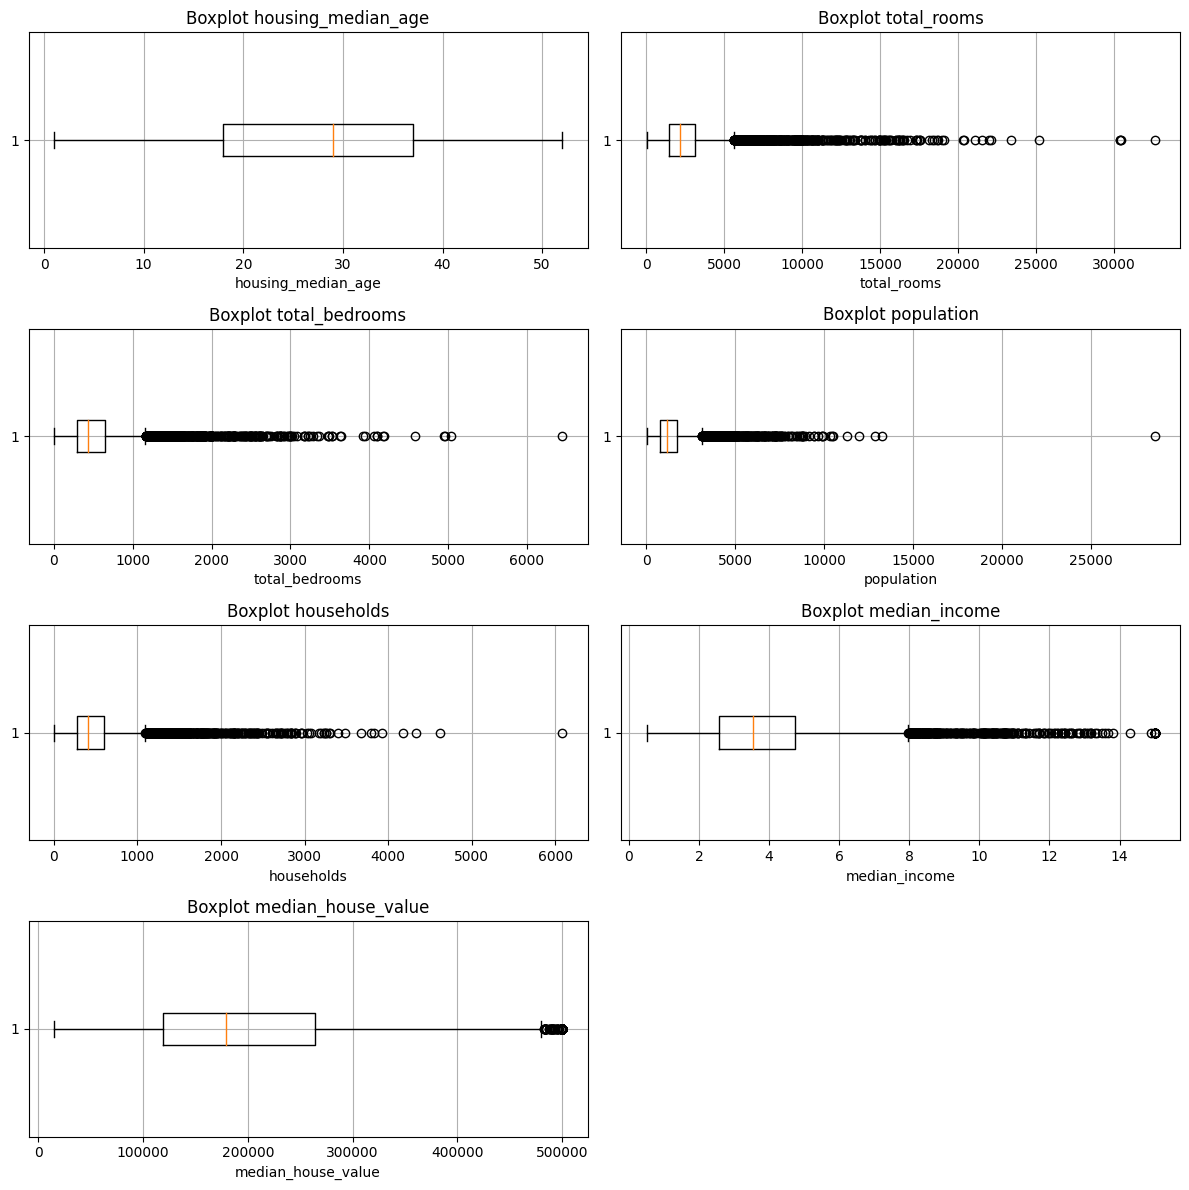

In [ ]:
# membuat boxplot
fig, axs = plt.subplots(4, 2, figsize=(12, 12))
axs = axs.ravel()

for idx, col in enumerate(num_cols):
    axs[idx].boxplot(df_train[col], vert=False)
    axs[idx].set_title(f'Boxplot {col}')
    axs[idx].set_xlabel(col)
    axs[idx].grid(True)

axs[-1].axis('off')

plt.tight_layout()
# plt.savefig("boxplot1.png", dpi=300, bbox_inches='tight')
plt.show()

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>Berdasarkan visualisasi dari boxplot, selain dari fitur <mark style="background-color: lightgray";>housing_median_age</mark>, terdapat data-data outlier pada fitur yang akan digunakan.
    Data outlier ini akan dikurangi untuk meminimalisir pengaruh data outlier tersebut terhadap prediksi model <i>machine learning</i>.
    </p>
    </div>

In [ ]:
# membuat fungsi mengatasi outlier
def remove_outlier(df_train, column):
    if df_train[column].dtype != object:
        Q1 = df_train[column].quantile(0.25)
        Q3 = df_train[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_train = df_train[(df_train[column] >= lower_bound) & (df_train[column] <= upper_bound)]
    return df_train



In [ ]:
# looping fungsi mengatasi outlier
for col in df_train.drop(['longitude', 'latitude'], axis=1).columns:
    df_train = remove_outlier(df_train, col)


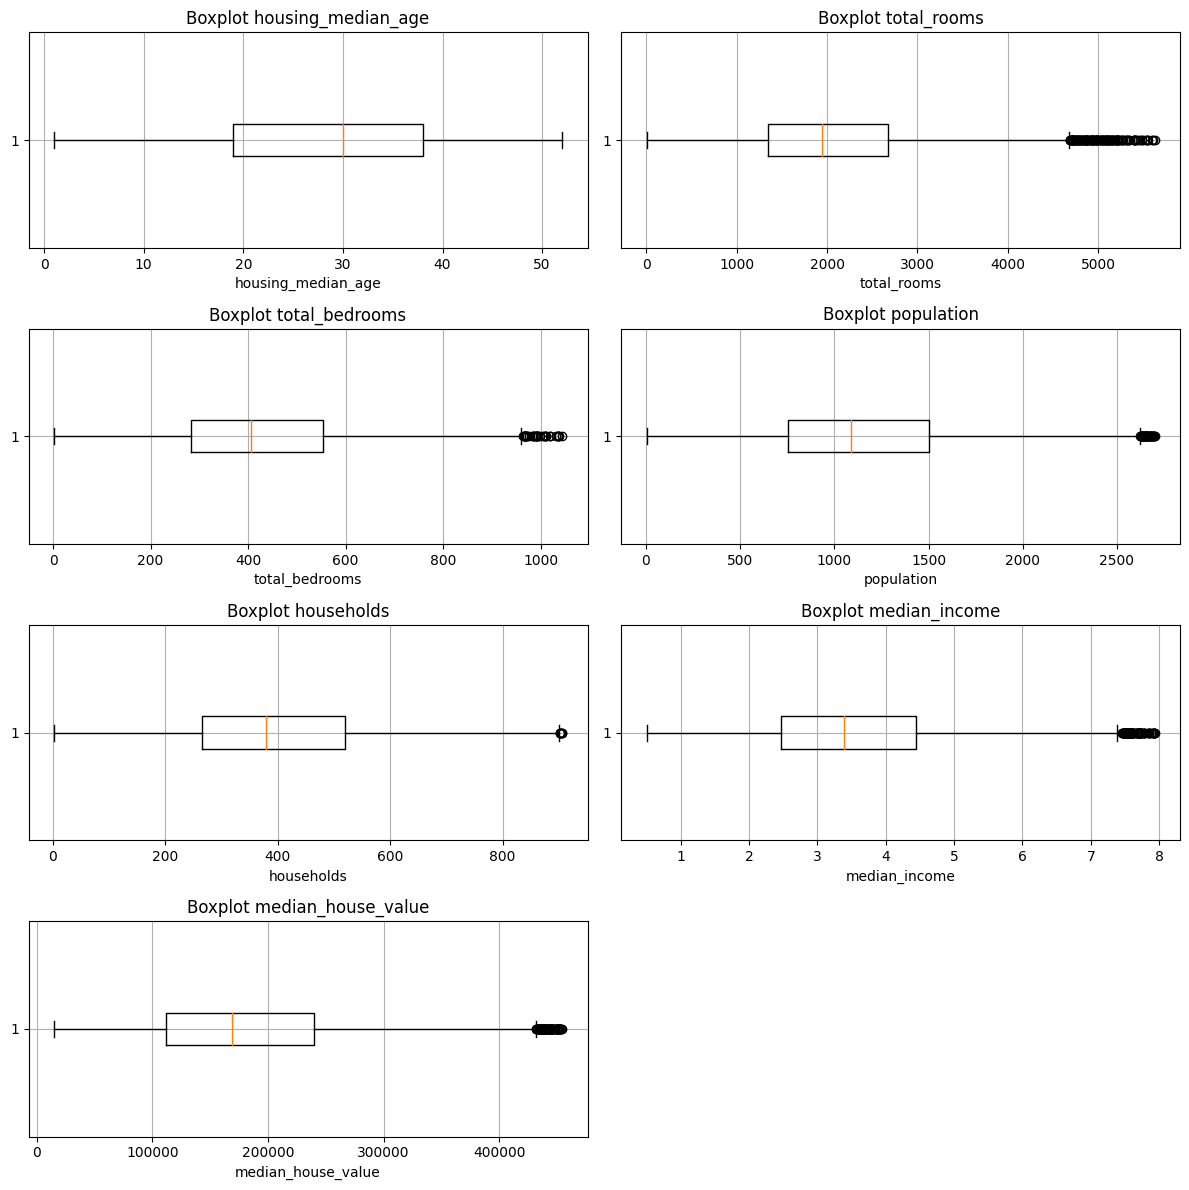

In [ ]:
# boxplot sesudah mengatasi outlier
fig, axs = plt.subplots(4, 2, figsize=(12, 12))
axs = axs.ravel()

for idx, col in enumerate(num_cols):
    axs[idx].boxplot(df_train[col], vert=False)
    axs[idx].set_title(f'Boxplot {col}')
    axs[idx].set_xlabel(col)
    axs[idx].grid(True)

axs[-1].axis('off')

plt.tight_layout()
# plt.savefig("boxplot_no_outlier1.png", dpi=300, bbox_inches='tight')
plt.show()

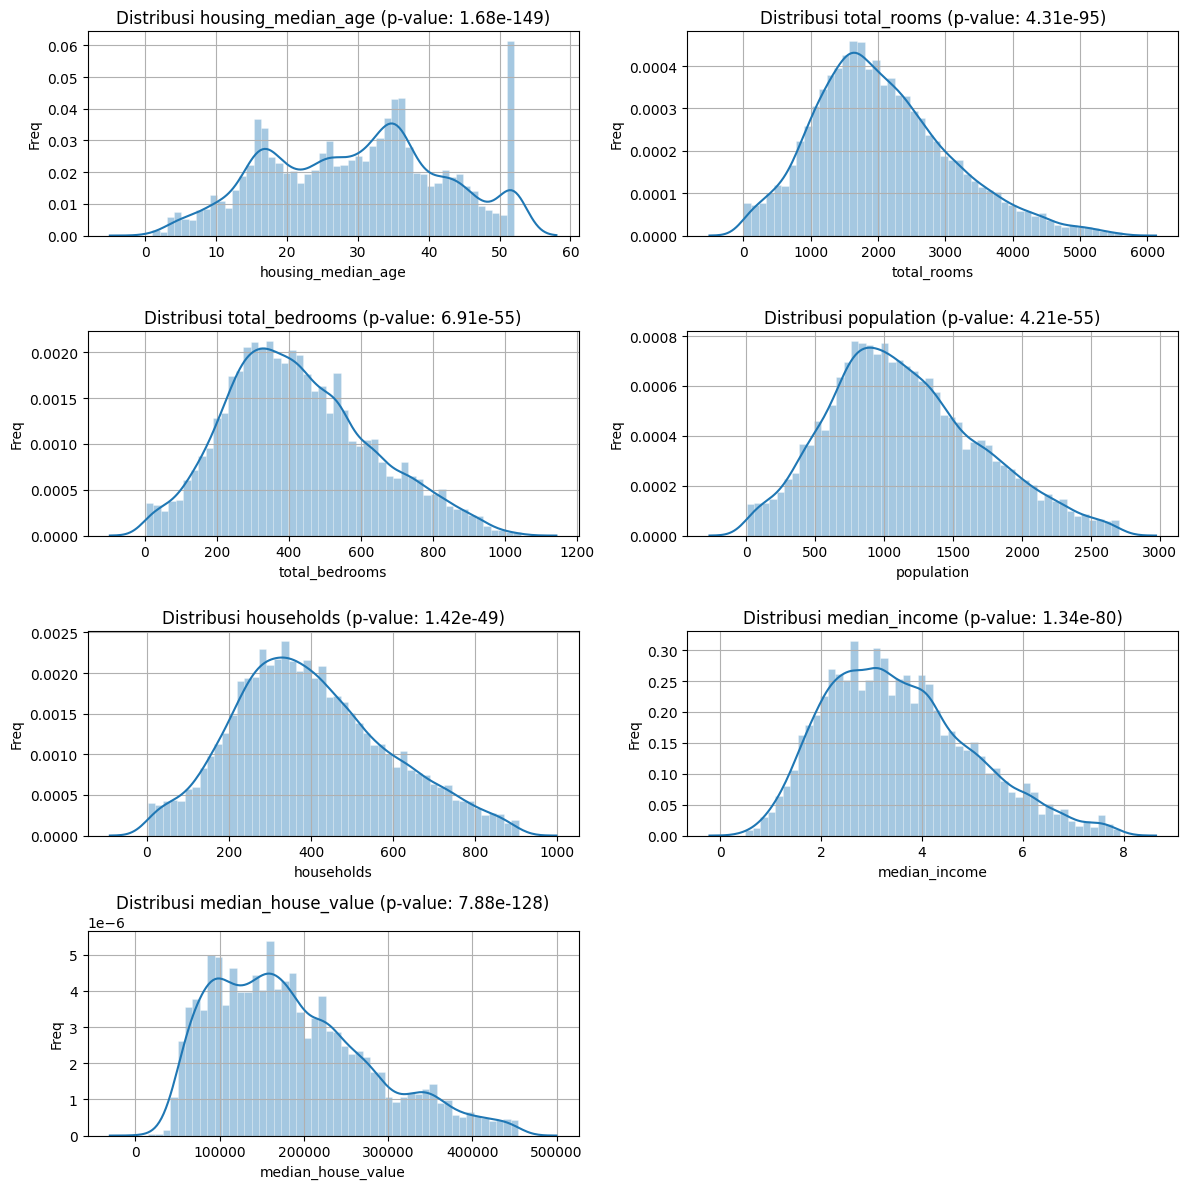

In [ ]:
# histogram sesudah mengatasi outlier
fig, axs = plt.subplots(4, 2, figsize=(12, 12))
axs = axs.ravel()

for idx, col in enumerate(num_cols):
    stat, p_value = normaltest(df_train[col])
    sns.histplot(df_train[col], bins=50, kde=True, stat="density", kde_kws=dict(cut=3),
                 alpha=.4, edgecolor=(1, 1, 1, .4), ax=axs[idx])

    axs[idx].set_title(f'Distribusi {col} (p-value: {p_value:.2e})')
    axs[idx].set_xlabel(col)
    axs[idx].set_ylabel('Freq')
    axs[idx].grid(True)

# hapus subplot kosong
axs[-1].axis('off')

plt.tight_layout()
# plt.savefig("histplot_no_outlier1.png", dpi=300, bbox_inches='tight')
plt.show()

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>Berdasarkan visualisasi dari boxplot, histogram, dan p-value dari normaltest. Distribusi data fitur sesudah mengatasi outlier belum terdistribusi normal dan memiliki <i>positive skew</i>, maka tahap pemeriksaan korelasi antar fitur selanjutnya akan menggunakan <i>Spearman Correlation</i>.
    </p>
    </div>

#### 3.4 Korelasi Fitur <a name="correlation"></a>

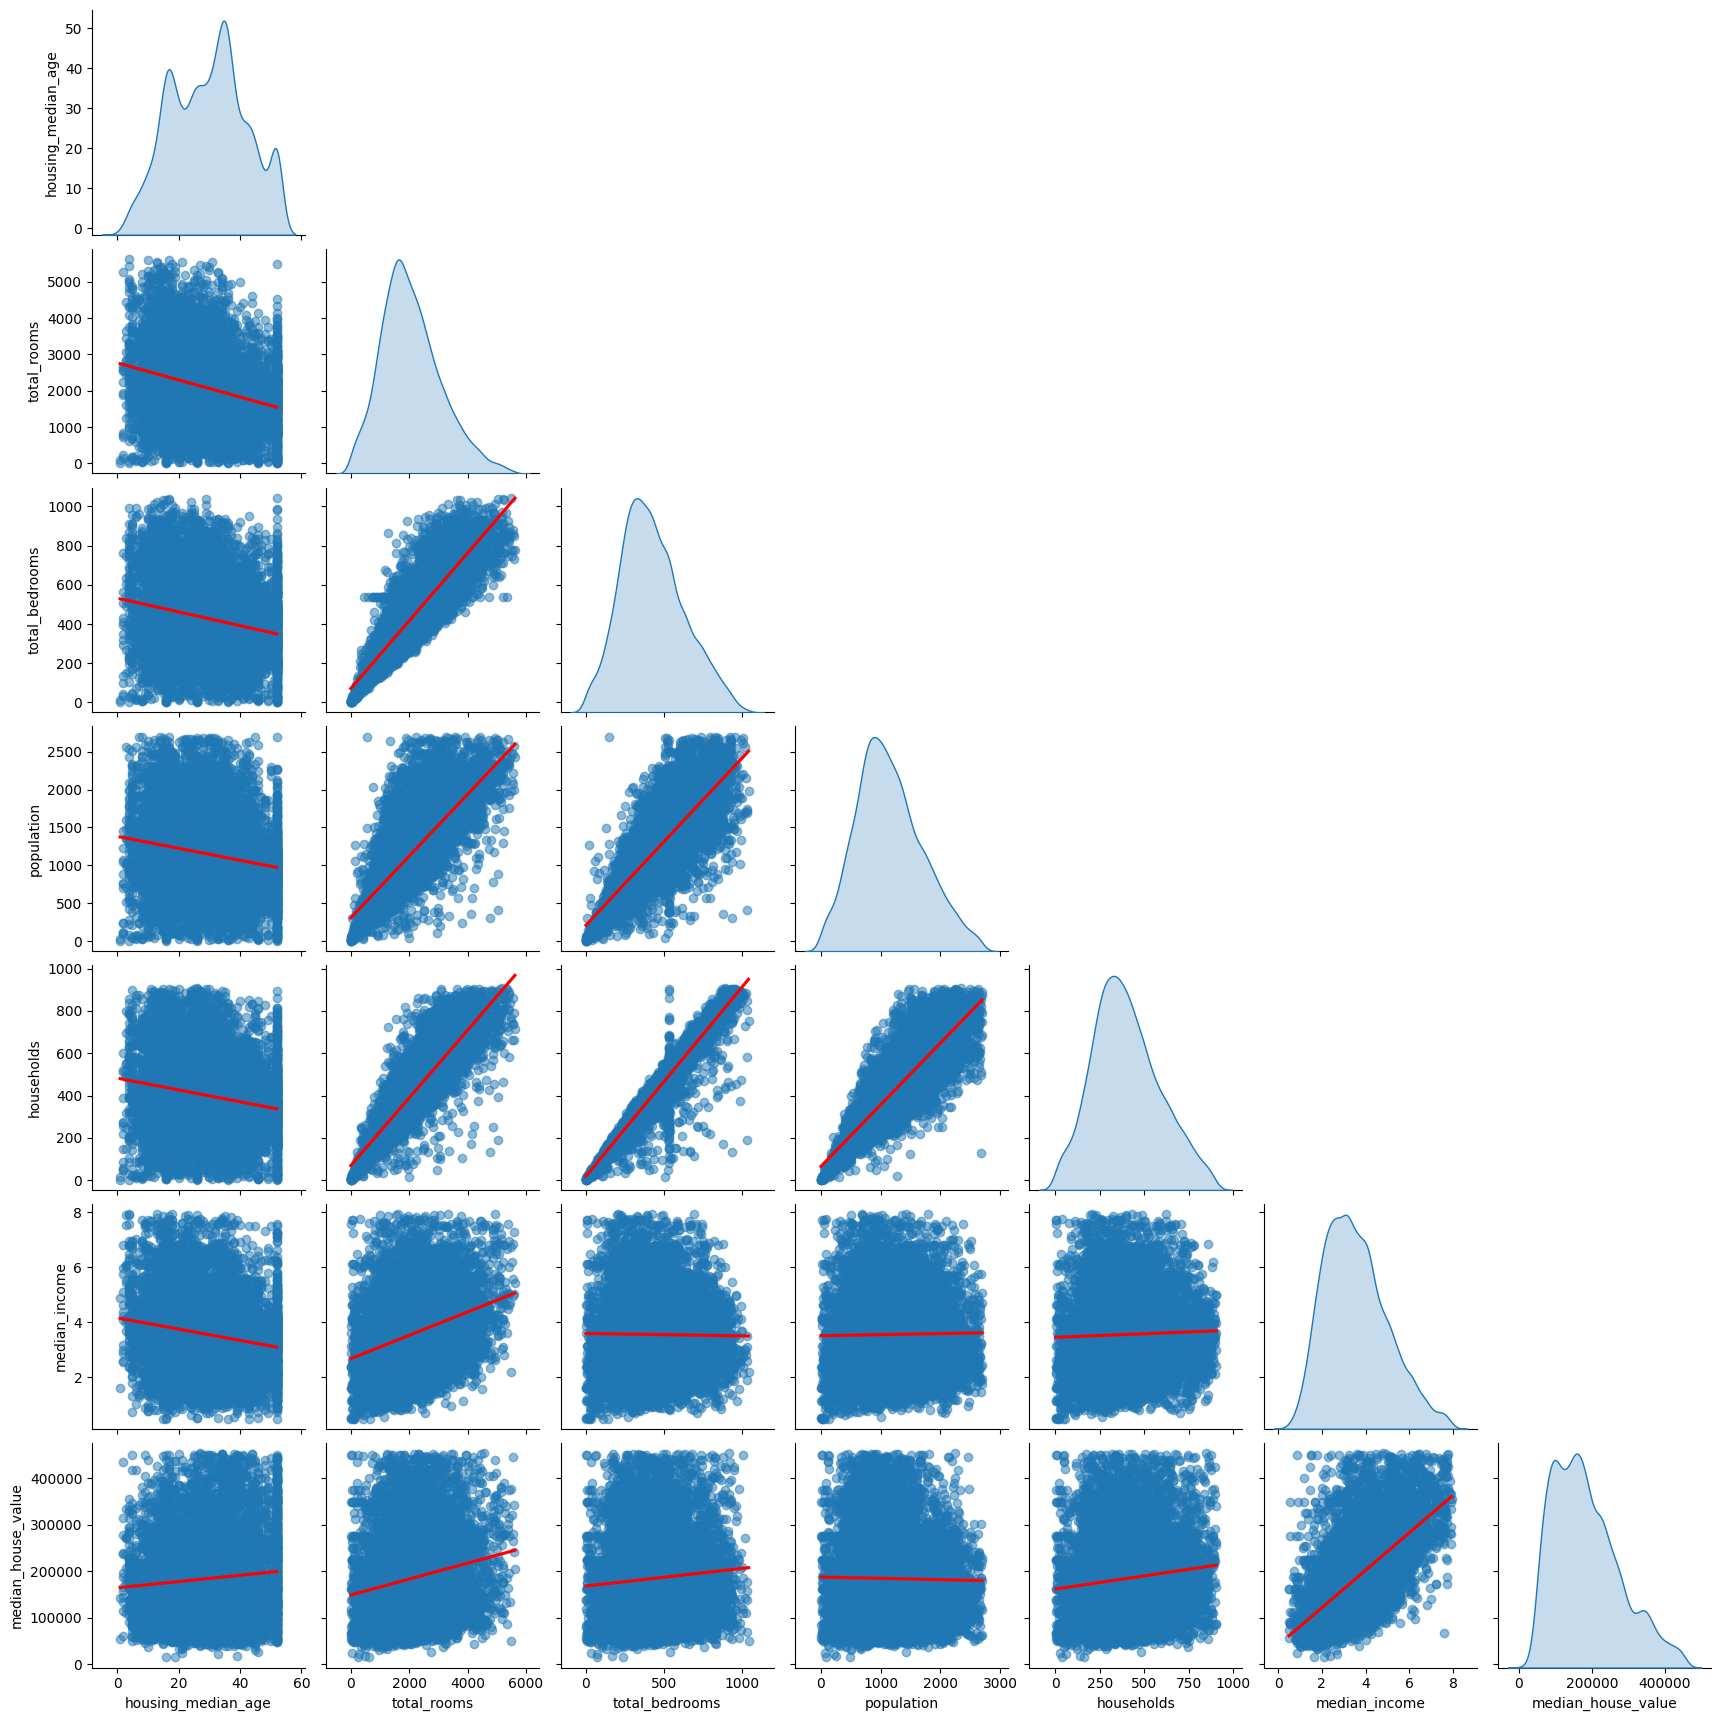

In [ ]:
# membuat matrix korelasi fitur-fitur numerik
correlation_matrix = df_train.select_dtypes(exclude='object').columns.drop(['longitude', 'latitude'])

# visualisasi pairplot
graph = sns.pairplot(df_train[correlation_matrix], kind='reg', diag_kind='kde',
                 plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}, 'ci': None})

# iterasi untuk the axes dan mask pairplot sebelah atas
for i, j in zip(*np.triu_indices_from(graph.axes, 1)):
    graph.axes[i, j].set_visible(False)
# plt.savefig("pairplot1.png", dpi=300, bbox_inches='tight')
plt.show()

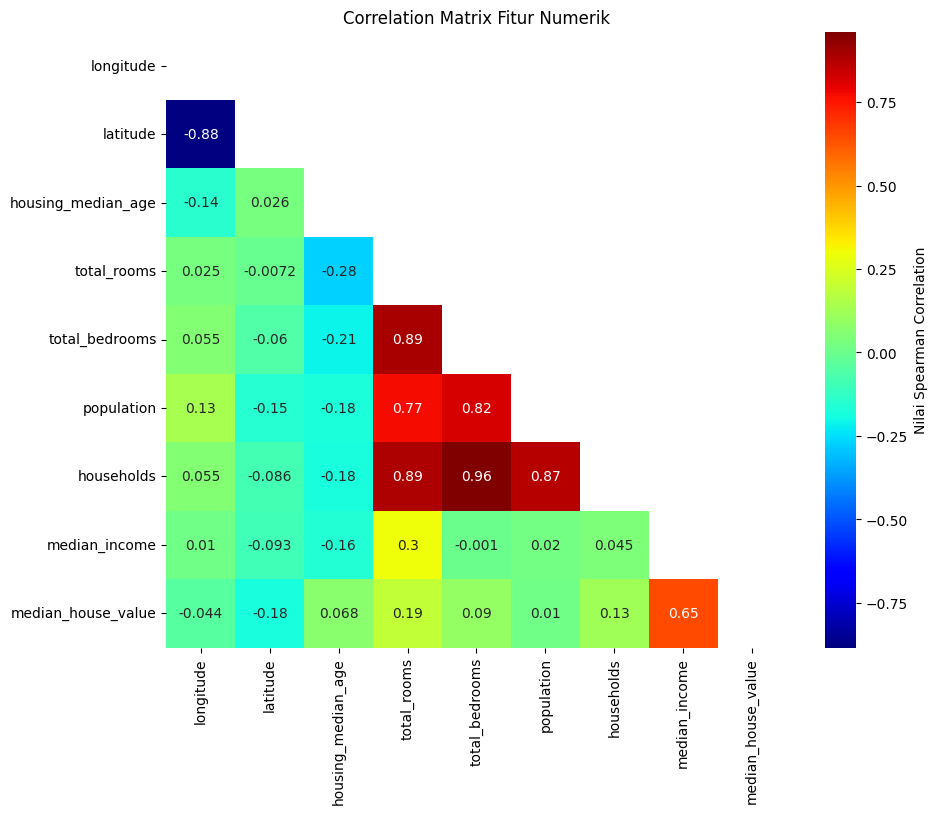

In [ ]:
# membuat matrix korelasi fitur-fitur numerik
correlation_matrix = df_train.select_dtypes(exclude='object').corr(method='spearman')

# masking untuk sebelah atas heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# visualisasi Correlation matrix menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, cmap='jet', annot=True, cbar_kws={'label': 'Nilai Spearman Correlation'})
plt.title('Correlation Matrix Fitur Numerik')
plt.savefig("corr_heatmap1.png", dpi=300, bbox_inches='tight')
plt.show()

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>Berdasarkan visualisasi dari pairplot dan heatmap dari fitur-fitur numerik, korelasi fitur-fitur numerik yang tinggi (melebihi batas <i>threshold</i> <b>0.75</b>) adalah <mark style="background-color: lightgray";>total_rooms</mark>, <mark style="background-color: lightgray";>total_bedrooms</mark>, <mark style="background-color: lightgray";>households</mark>, dan <mark style="background-color: lightgray";>population</mark>. Dalam model <i>machine learning</i> regresi, hubungan korelasi antar fitur yang tinggi atau <i>multicollinearity</i> harus dihindari, karena akan membuat prediksi model menjadi <i>overfit</i>, dimana hasil <i>test prediction</i> lebih buruk dari hasil <i>training model</i>. Karena nilai korelasi tertinggi antar fitur yang dekat pada <i>threshold</i> adalah <b>0.77</b>, maka fitur yang akan digunakan adalah <mark style="background-color: lightgray";>total_rooms</mark> dan <mark style="background-color: lightgray";>population</mark>, sedangkan fitur <mark style="background-color: lightgray";>total_bedrooms</mark> dan <mark style="background-color: lightgray";>households</mark> tidak digunakan dalam model <i>machine learning</i> karena memiliki korelasi senilai <b>0.96</b>.
    </p>
    </div>

#### [Kembali ke Daftar Isi](#contents)

### **4. Pembuatan Model** <a name="modeling"></a>

#### 4.1 <i>Feature Selection & Engineering</i> <a name="feat_select"></a>

In [ ]:
# fitur yang akan digunakan
X_train=X_train.drop(['total_bedrooms', 'households', 'ocean_proximity'], axis=1)
X_test=X_test.drop(['total_bedrooms', 'households', 'ocean_proximity'], axis=1)

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>Karena data fitur-fitur yang akan digunakan tidak terdistribusi normal, maka pembobotan data fitur akan menggunakan <i>RobustScaler</i> yang memiliki sensitifitas rendah terhadap outlier.
    </p>
    </div>

In [ ]:
# preprocessor: numeric and categorical data handling
preprocessor = ColumnTransformer(
    transformers=[
        ('Numerical', Pipeline([
            ('imputer', KNNImputer(n_neighbors=5, weights='distance', metric='nan_euclidean')),
            ('scaler', RobustScaler())
        ]), ['longitude', 'latitude','housing_median_age', 'total_rooms', 'population', 'median_income']),
],remainder='passthrough')

#### 4.2 Pembuatan <i>Benchmark Model</i> <a name="benchmark"></a>

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>Tahap pertama dilakukan adalah pemilihan beberapa dari model seperti <i>Lasso, Ridge, Linear Regression, K-Nearest Neighbor, Decision Tree, SVR, Random Forest, XGBoost, LightGBM, dan CatBoost</i>. Kemudian hasil evaluasi model akan diurutkan berdasarkan nilai <mark style="background-color: lightgray";>Mean_R<sup>2</sup></mark> terbesar.
    </p>
    </div>

In [ ]:
# inisialisasi model
ridge= Ridge()
lasso = Lasso()
lr = LinearRegression()
knn = KNeighborsRegressor(weights='distance') # weight='distance'; pembobotan lebih pada data dengan jarak euclidean terdekat
dt = DecisionTreeRegressor(random_state= 8492)
svr= SVR()
rf = RandomForestRegressor(random_state= 8492)
xgb = XGBRegressor(random_state= 8492)
lgbm = LGBMRegressor(random_state= 8492, force_col_wise=True, verbosity=-1) # force_col_wise=True; menggunakan CPU multi-threading, verbosity=-1; minimalisir print info
cat = CatBoostRegressor(random_state= 8492, silent=True) # silent=True; mengurangi print info

# model yang akan diuji
models = [ridge, lasso, lr, knn, dt, svr, rf, xgb, lgbm, cat]
model_names = ['Ridge Regressor',
               'Lasso Regressor',
               'Linear Regression',
               'KNN Regressor',
               'Decision Tree Regressor',
               'Support Vector Regressor (SVR)',
               'Random Forest Regressor',
               'Extreme Gradient Boosting (XGBoost)',
               'Light Gradient Boosting Machine (LightGBM)',
               'CatBoost Regressor'
               ]

# scaler
robust = RobustScaler()

# metric list
nilai_mean_mae = []
nilai_std_mae = []

nilai_mean_mape = []
nilai_std_mape = []

nilai_mean_rmse = []
nilai_std_rmse = []

nilai_mean_r2 = []
nilai_std_r2 = []

# fit model ke pipeline
for i in models:

    crossval = KFold(n_splits=5, shuffle=True, random_state=8492)

    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('feature_selection', SelectKBest(score_func=f_classif, k='all')),
        ('scaler', robust),
        ('model', i)
    ])

    # MAE
    model_cv_mae = cross_val_score(
        pipeline,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise'
    )

    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        pipeline,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise'
    )

    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

    # RMSE
    model_cv_rmse = cross_val_score(
        pipeline,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
    )

    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # R-squared
    model_cv_r2 = cross_val_score(
        pipeline,
        X_train,
        y_train,
        cv=crossval,
        scoring='r2',
        error_score='raise'
    )

    nilai_mean_r2.append(model_cv_r2.mean())
    nilai_std_r2.append(model_cv_r2.std())

In [ ]:
# buat data untuk hasil evaluasi
hasil_evaluasi = pd.DataFrame({
    'Model': model_names,
    'Mean_RMSE': np.abs(nilai_mean_rmse),
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': np.abs(nilai_mean_mae),
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': np.abs(nilai_mean_mape),
    'Std_MAPE': nilai_std_mape,
    'Mean_R^2': np.abs(nilai_mean_r2),
    'Std_R^2': nilai_std_r2
})

# tampilkan data
hasil_evaluasi.sort_values(by='Mean_R^2', ascending=False).reset_index(drop=True)

Model      Mean_RMSE     Std_RMSE  \
0                          CatBoost Regressor   47230.155660   693.079675   
1  Light Gradient Boosting Machine (LightGBM)   49123.885504   723.886926   
2         Extreme Gradient Boosting (XGBoost)   50392.445694   992.551566   
3                     Random Forest Regressor   52099.797315   619.552814   
4                               KNN Regressor   68175.776688   878.415908   
5                             Ridge Regressor   71576.801340  1443.680928   
6                             Lasso Regressor   71577.123590  1443.610853   
7                           Linear Regression   71577.161013  1443.703956   
8                     Decision Tree Regressor   72111.770636  1189.403891   
9              Support Vector Regressor (SVR)  118716.355624  2078.524840   

       Mean_MAE      Std_MAE  Mean_MAPE  Std_MAPE  Mean_R^2   Std_R^2  
0  31582.187871   441.032485   0.178818  0.003443  0.833190  0.007530  
1  33092.897494   608.573108   0.187115  0.002670  0.819591  0.006988  
2  33736.874045   684.054063   0.189994  0.002887  0.810022  0.010845  
3  34291.495691   501.801748   0.189302  0.002227  0.797025  0.008612  
4  47818.787068   638.432028   0.275485  0.007132  0.652697  0.006818  
5  53291.696372   850.974121   0.320913  0.008552  0.617062  0.014964  
6  53296.907684   851.355445   0.321019  0.008539  0.617057  0.014993  
7  53297.299409   851.419951   0.321026  0.008539  0.617057  0.014995  
8  46192.354456  1155.428644   0.249260  0.008328  0.611143  0.017991  
9  88373.598778  1425.951742   0.525591  0.016863  0.052820  0.012425

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>
    Berdasarkan hasil evaluasi dari model-model tersebut akan dipilih 3 model yang memiliki nilai nilai <mark style="background-color: lightgray";>Mean_R<sup>2</sup></mark> terbesar.
    Model yang akan digunakan adalah
    <i> CatBoost, LightGBM, dan XGBoost </i>.
    </p>
    </div>

#### 4.3 Prediksi Test Data Menggunakan <i>Benchmark Model</i> <a name="bench_pred"></a>

In [ ]:
# evaluasi 3 model terbaik sebelum optimasi
models = {
    'CatBoost': CatBoostRegressor(random_state=8492, silent=True),
    'XGBoost': XGBRegressor(random_state=8492),
    'LightGBM': LGBMRegressor(random_state=8492, force_col_wise=True, verbosity=-1)
}

score_rmse = []
score_mae = []
score_mape = []
score_r2 = []

# predict X_test sebelum optimasi
for i in models:

    model = Pipeline([
        ('preprocessing', preprocessor),
        ('feature_selection', SelectKBest(score_func=f_classif,k='all')),
        ('scaler', robust),
        ('model', models[i])
    ])

    model.fit(X_train, y_train)
    y_pred_before_tuned= model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_before_tuned)))
    score_mae.append(mean_absolute_error(y_test, y_pred_before_tuned))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred_before_tuned))
    score_r2.append(r2_score(y_test, y_pred_before_tuned))

# membuat dataframe hasil sebelum optimasi
score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape, 'R^2': score_r2}, index=models.keys())
score_before_tuning

RMSE           MAE      MAPE       R^2
CatBoost  46403.328658  31198.396574  0.176042  0.835688
XGBoost   48139.582531  32488.968643  0.181116  0.823162
LightGBM  48193.891169  32741.832461  0.184996  0.822763

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>
    Setelah model-model tersebut menjalankan prediksi data test untuk mendapatkan hasil evaluasi  metrik awal, kemudian tahap selanjutnya adalah melakukan pengaturan model atau <i>Hyperparameter Tuning</i>.
    </p>
    </div>

#### 4.4 <i>Hyperparameter Tuning</i> <a name="hyperparam"></a>



<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>
    Pengaturan optimasi model akan dilakukan menggunakan modul <i>RandomSearchCV</i>, agar optimasi dapat dilakukan dengan optimal dan efisien terhadap performa komputasi perangkat yang digunakan.
    </p>
    </div>

In [ ]:
# Parameter grids model
xgb_param_grid = {
    'learning_rate': np.linspace(0.01, 0.3, 30),
    'max_depth': np.arange(3, 11),
    'min_child_weight': np.arange(1, 11),
    'subsample': np.linspace(0.5, 1.0, 10),
    'colsample_bytree': np.linspace(0.5, 1.0, 10),
    'lambda': np.logspace(-8, 1, 10),
    'alpha': np.logspace(-8, 1, 10),
    'n_estimators': np.arange(100, 1001, 100)
}

lgbm_param_grid = {
    'learning_rate': np.linspace(0.01, 0.3, 30),
    'num_leaves': np.arange(20, 151),
    'max_depth': np.arange(3, 11),
    'n_estimators': np.arange(100, 1001, 100),
    'min_child_samples': np.arange(5, 101),
    'subsample': np.linspace(0.5, 1.0, 10),
    'colsample_bytree': np.linspace(0.5, 1.0, 10),
    'lambda_l1': np.logspace(-8, 1, 10),
    'lambda_l2': np.logspace(-8, 1, 10)
}

cat_param_grid = {
    'learning_rate': np.logspace(-2, 0, 30),
    'depth': np.arange(1, 11),
    'subsample': np.linspace(0.05, 1.0, 20),
    'colsample_bylevel': np.linspace(0.05, 1.0, 20),
    'min_data_in_leaf': np.arange(1, 101)
}

# RandomizedSearchCV XGBoost
print('Tuning XGBoost...')
xgb_model = XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=8492, verbosity=0)
xgb_search = RandomizedSearchCV(xgb_model, xgb_param_grid, n_iter=50, cv=3, scoring='neg_root_mean_squared_error', random_state=8492, verbose=1)
xgb_search.fit(X_train, y_train)
xgb_best_rmse = np.sqrt(-xgb_search.best_score_)
print('Best XGBoost hyperparameters:', xgb_search.best_params_)
print('Best XGBoost RMSE:', xgb_best_rmse)

# RandomizedSearchCV LightGBM
print('Tuning LightGBM...')
lgbm_model = LGBMRegressor(objective='regression', metric='rmse', random_state=8492, force_col_wise=True, verbosity=-1)
lgbm_search = RandomizedSearchCV(lgbm_model, lgbm_param_grid, n_iter=50, cv=3, scoring='neg_root_mean_squared_error', random_state=8492, verbose=1)
lgbm_search.fit(X_train, y_train)
lgbm_best_rmse = np.sqrt(-lgbm_search.best_score_)
print('Best LightGBM hyperparameters:', lgbm_search.best_params_)
print('Best LightGBM RMSE:', lgbm_best_rmse)

# RandomizedSearchCV CatBoost
print('Tuning CatBoost...')
cat_model = CatBoostRegressor(iterations=1000, random_state=8492, silent=True)
cat_search = RandomizedSearchCV(cat_model, cat_param_grid, n_iter=50, cv=3, scoring='neg_root_mean_squared_error', random_state=8492, verbose=1)
cat_search.fit(X_train, y_train)
cat_best_rmse = np.sqrt(-cat_search.best_score_)
print('Best CatBoost hyperparameters:', cat_search.best_params_)
print('Best CatBoost RMSE:', cat_best_rmse)

# ringkasan hasil terbaik
print('\nRingkasan Hasil RMSE Terbaik:')
print(f'XGBoost RMSE: {xgb_best_rmse}')
print(f'LightGBM RMSE: {lgbm_best_rmse}')
print(f'CatBoost RMSE: {cat_best_rmse}')


Tuning XGBoost...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best XGBoost hyperparameters: {'subsample': 0.5, 'n_estimators': 500, 'min_child_weight': 9, 'max_depth': 8, 'learning_rate': 0.03, 'lambda': 1e-06, 'colsample_bytree': 0.8888888888888888, 'alpha': 10.0}
Best XGBoost RMSE: 218.61448343408054
Tuning LightGBM...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best LightGBM hyperparameters: {'subsample': 0.7222222222222222, 'num_leaves': 32, 'n_estimators': 400, 'min_child_samples': 24, 'max_depth': 9, 'learning_rate': 0.06999999999999999, 'lambda_l2': 0.09999999999999999, 'lambda_l1': 1.0, 'colsample_bytree': 0.9444444444444444}
Best LightGBM RMSE: 220.3576575465109
Tuning CatBoost...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best CatBoost hyperparameters: {'subsample': 0.85, 'min_data_in_leaf': 54, 'learning_rate': 0.12689610031679222, 'depth': 8, 'colsample_bylevel': 0.3}
Best CatBoost RMSE: 218.21976113576787

Ringkasan Ha

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>
    Setelah menjalankan pengaturan optimasi model  menggunakan <i>RandomSearchCV</i> dan mendapatkan pengaturan <i>Hyperparameter Tuning</i> terbaik untuk masing-masing model. Tahap selanjutnya adalah melakukan prediksi ke test data menggunakan pengaturan tersebut.
    </p>
    </div>

#### 4.5 Prediksi Test Data Menggunakan <i>Tuned Model</i> <a name="tuned_pred"></a>

In [ ]:
# inisialisasi model dengan optimasi
models_tuned = {
    'CatBoost_Tuned': CatBoostRegressor(**cat_search.best_params_, random_state=8492, silent=True),
    'XGBoost_Tuned': XGBRegressor(**xgb_search.best_params_, random_state=8492),
    'LightGBM_Tuned': LGBMRegressor(**lgbm_search.best_params_, random_state=8492, force_col_wise=True, verbosity=-1)
}

score_rmse_after = []
score_mae_after = []
score_mape_after = []
score_r2_after = []

# predict X_test setelah tuning
for i in models_tuned:

    model_tuned = Pipeline([
        ('preprocessing', preprocessor),
        ('feature_selection', SelectKBest(score_func=f_classif, k='all')),
        ('scaler', robust),
        ('model', models_tuned[i])
    ])

    model_tuned.fit(X_train, y_train)
    y_pred_after_tuned = model_tuned.predict(X_test)
    score_rmse_after.append(np.sqrt(mean_squared_error(y_test, y_pred_after_tuned)))
    score_mae_after.append(mean_absolute_error(y_test, y_pred_after_tuned))
    score_mape_after.append(mean_absolute_percentage_error(y_test, y_pred_after_tuned))
    score_r2_after.append(r2_score(y_test, y_pred_after_tuned))

# membuat dataframe hasil setelah tuning
score_after_tuning = pd.DataFrame({'RMSE': score_rmse_after, 'MAE': score_mae_after, 'MAPE': score_mape_after, 'R^2': score_r2_after}, index=models_tuned.keys())
score_after_tuning

RMSE           MAE      MAPE       R^2
CatBoost_Tuned  47053.921782  31448.467065  0.178203  0.831049
XGBoost_Tuned   46762.788768  31161.985103  0.174992  0.833133
LightGBM_Tuned  46888.366026  31497.508492  0.175943  0.832235

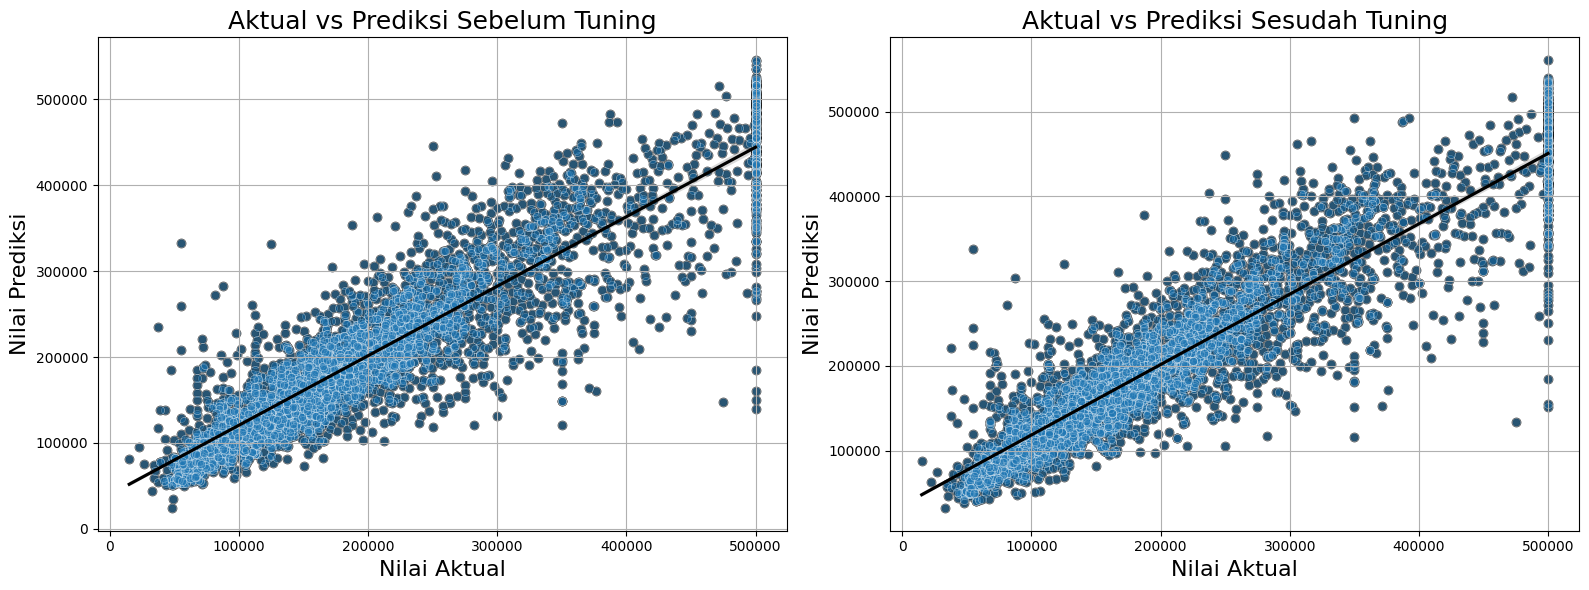

In [ ]:
plt.figure(figsize=(16, 6))

# subplot (sebelum tuning)
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
sns.regplot(x=y_test, y=y_pred_before_tuned, color='black')
sns.scatterplot(x=y_test, y=y_pred_before_tuned, alpha=0.5)
plt.xlabel('Nilai Aktual', fontsize=16)
plt.ylabel('Nilai Prediksi', fontsize=16)
plt.title('Aktual vs Prediksi Sebelum Tuning', fontsize=18)
plt.grid()

# subplot (sesudah tuning)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
sns.regplot(x=y_test, y=y_pred_after_tuned, color='black')
sns.scatterplot(x=y_test, y=y_pred_after_tuned, alpha=0.5)
plt.xlabel('Nilai Aktual', fontsize=16)
plt.ylabel('Nilai Prediksi', fontsize=16)
plt.title('Aktual vs Prediksi Sesudah Tuning', fontsize=18)
plt.grid()

plt.tight_layout()
plt.savefig("scatter_tune1.png", dpi=300, bbox_inches='tight')
plt.show()

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>Berdasarkan visualisasi scatterplot hasil prediksi sebelum dan setelah optimasi, dapat dilihat dari garis regresi yang dimodelkan dapat mewakili mayoritas kumpulan data.</p>
    <p>Setelah mendapatkan hasil evaluasi metrik prediksi data test dari model optimal. Dapat dilakukan perbandingan hasil evaluasi metrik model sebelum optimasi terhadap hasil evaluasi metrik model setelah optimasi, untuk mendapatkan deskripsi umum terhadap hasil optimasi model.
    </p>
    </div>

#### 4.6 Perbandingan Performa Model <a name="comparison"></a>

In [ ]:
print("Hasil evaluasi metrik model sebelum optimasi:")
display(score_before_tuning)
print("\nHasil evaluasi metrik model setelah optimasi:")
display(score_after_tuning)

Hasil evaluasi metrik model sebelum optimasi:


RMSE           MAE      MAPE       R^2
CatBoost  46403.328658  31198.396574  0.176042  0.835688
XGBoost   48139.582531  32488.968643  0.181116  0.823162
LightGBM  48193.891169  32741.832461  0.184996  0.822763


Hasil evaluasi metrik model setelah optimasi:


RMSE           MAE      MAPE       R^2
CatBoost_Tuned  47053.921782  31448.467065  0.178203  0.831049
XGBoost_Tuned   46762.788768  31161.985103  0.174992  0.833133
LightGBM_Tuned  46888.366026  31497.508492  0.175943  0.832235

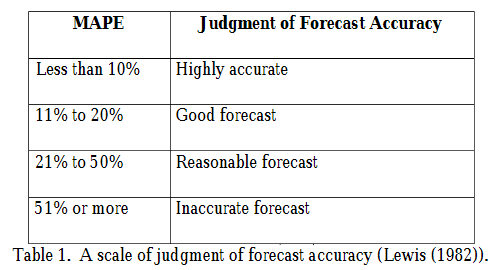


<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>
    <i>Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting</i>
    </p>
    </div>

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>
    Berdasarkan hasil evaluasi metrik model-model yang digunakan setelah optimasi, <i>CatBoost, XGBoost, </i>dan <i>LightGBM</i> memiliki MAPE senilai <b>17.82%</b>, <b>17.49%</b>, dan <b>17.59%</b>. Nilai MAPE model-model ini dapat dikategorikan ke dalam <i>Good forecast</i> (Lewis,1982).
    </p>
    </div>

In [ ]:
# membuat dataframe hasil perbandingan
score_rmse = np.array(score_rmse)
score_rmse_after = np.array(score_rmse_after)

score_mae = np.array(score_mae)
score_mae_after = np.array(score_mae_after)

score_mape = np.array(score_mape)
score_mape_after = np.array(score_mape_after)

score_r2 = np.array(score_r2)
score_r2_after = np.array(score_r2_after)

score_diff = pd.DataFrame({
    'RMSE': score_rmse_after - score_rmse,
    'MAE': score_mae_after - score_mae,
    'MAPE': score_mape_after - score_mape,
    'R^2': score_r2_after - score_r2
}, index=models_tuned.keys())
score_diff.rename(index={'CatBoost_Tuned': 'CatBoost',
                 'XGBoost_Tuned': 'XGBoost',
                 'LightGBM_Tuned': 'LightGBM'}, inplace=True)

print("\nSelisih hasil perbandingan:")
score_diff.sort_values(by='R^2', ascending=True)


Selisih hasil perbandingan:


RMSE          MAE      MAPE       R^2
CatBoost   650.593124   250.070491  0.002161 -0.004640
LightGBM -1305.525143 -1244.323968 -0.009053  0.009472
XGBoost  -1376.793763 -1326.983540 -0.006124  0.009970

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>
    Berdasarkan hasil perbandingan hasil evaluasi metrik model sebelum optimasi terhadap hasil evaluasi metrik model setelah optimasi, model <i>CatBoost</i> memiliki perbedaan nilai R<sup>2</sup> yang terendah senilai <b>0.831</b> dibanding model <i>LightGBM</i> senilai <b>0.832</b> dan <i>XGBoost</i> senilai <b>0.833</b>. Maka model <i>CatBoost</i> dipilih untuk model prediksi harga jual properti California.
    </p>
    </div>

#### 4.7 Pembuatan <i>Final Model</i> dan <i>Save Model</i> <a name="final_save"></a>

In [ ]:
# final model
X=df.drop(['median_house_value','total_bedrooms','households','ocean_proximity'], axis=1)
y=df['median_house_value']

preprocessor = ColumnTransformer(
    transformers=[
        ('Numerical', Pipeline([
            ('imputer', KNNImputer(n_neighbors=5, weights='distance', metric='nan_euclidean')),
            ('scaler', RobustScaler())
        ]), ['longitude', 'latitude','housing_median_age', 'total_rooms', 'population', 'median_income']),
],remainder='passthrough')

final_model = Pipeline([
        ('preprocessing', preprocessor),
        ('feature_selection', SelectKBest(score_func=f_classif, k='all')),
        ('scaler', robust),
        ('model', CatBoostRegressor(**cat_search.best_params_, random_state=8492, silent=True))
    ])

# fit model
final_model.fit(X_train, y_train)

# save model
# filename = 'capstone3_catboost_rg.sav'
# pickle.dump(final_model, open(filename, 'wb'))

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(weights='distance')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms', 'population',
                                                   'median_income'])])),
                ('feature_selection', SelectKBest(k='all')),
                ('scaler', RobustScaler()),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7e4896d48ac0>)])

#### 4.8 <i>Feature Importance</i> <a name="feat_imp"></a>

Feature  Importance
5       Numerical__median_income   38.330857
0           Numerical__longitude   21.952119
1            Numerical__latitude   21.261955
2  Numerical__housing_median_age    6.785362
3         Numerical__total_rooms    6.176390
4          Numerical__population    5.493316

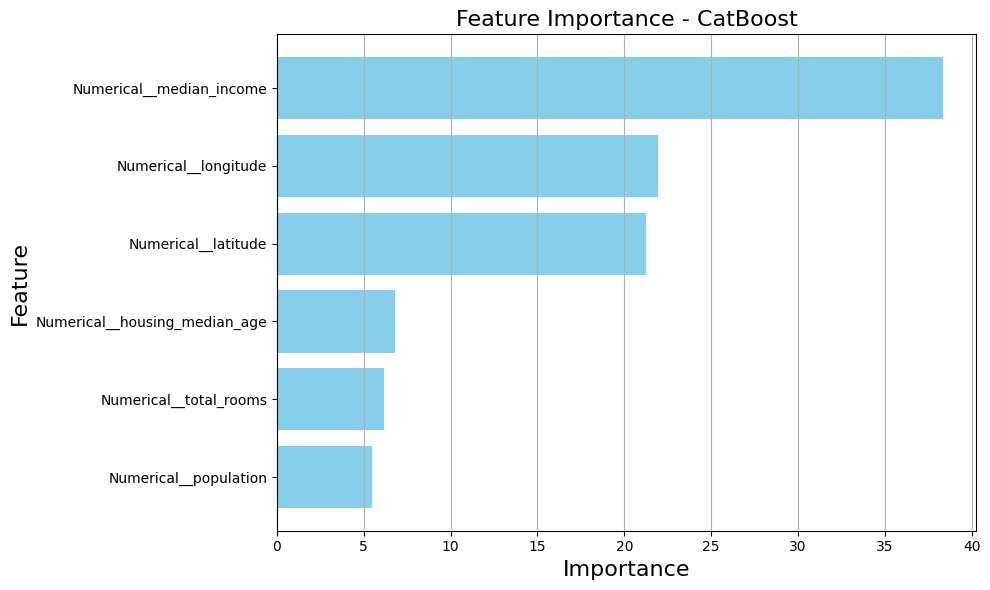

In [ ]:
# mengambil model dari pipeline
catboost_model = final_model.named_steps['model']

# mengambil feature importance
importance = catboost_model.get_feature_importance()

# mengambil nama fitur setelah preprocessing
feature_names = final_model.named_steps['preprocessing'].get_feature_names_out()

# membuat dataframe
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# tampilkan dataFrame
display(importance_df)

# plot feature importance menggunakan horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance',fontsize=16)
plt.ylabel('Feature',fontsize=16)
plt.title('Feature Importance - CatBoost',fontsize=16)
plt.gca().invert_yaxis()  # urut dari tertinggi
plt.grid(axis='x')
plt.tight_layout()
plt.savefig("feat_imp.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>
    Berdasarkan visualisasi <i>Feature Importance</i>, fitur yang memiliki pengaruh besar pada prediksi harga jual properti California adalah <mark style="background-color: lightgray";>longitude</mark>, <mark style="background-color: lightgray";>latitude</mark> dan <mark style="background-color: lightgray";>median_income</mark> yang mana merupakan data lokasi geografis dan statistik pendapatan penduduk di daerah tersebut. Sedangkan <mark style="background-color: lightgray";>housing_median_age</mark>, <mark style="background-color: lightgray";>total_rooms</mark> dan <mark style="background-color: lightgray";>population</mark> memiliki kontribusi yang sedang terhadap prediksi harga jual properti California.
    </p>
    </div>

#### 4.9 Perbandingan Perhitungan Sederhana dengan <i>Machine Learning Regression</i> <a name="rule"></a>

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>
    Tahap selanjutnya melakukan perbandingan prediksi harga jual properti California menggunakan <i>machine learning</i> dengan perhitungan sederhana secara umum. Metode perhitungan harga jual properti sederhana pada umumnya hanya menggunakan mean harga jual properti dari beberapa jumlah properti yang berada di sekitarnya
    <br>
    <br>
    <i>Gabrielle Gayer, Itzhak Gilboa, and Offer Lieberman (2007) “Rule-Based and Case-Based Reasoning in Housing Prices,” The B.E. Journal of Theoretical Economics: Vol. 7: Iss. 1 (Advances), Article 10.</i>
    </p>
    </div>

In [ ]:
# membuat perhitungan harga jual properti sederhana
# menghitung median fitur
median_values = {
    'median_income': df_test['median_income'].median(),
    'total_rooms': df_test['total_rooms'].median(),
    'housing_median_age': df_test['housing_median_age'].median(),
    'population': df_test['population'].median(),
    'ocean_proximity': df_test['ocean_proximity'].mode()[0]
}

# set toleransi
tolerance = 0.25

# menghitung median fitur dengan toleransi 25%
income_range = (median_values['median_income'] * (1 - tolerance), median_values['median_income'] * (1 + tolerance))
rooms_range = (median_values['total_rooms'] * (1 - tolerance), median_values['total_rooms'] * (1 + tolerance))
age_range = (median_values['housing_median_age'] * (1 - tolerance), median_values['housing_median_age'] * (1 + tolerance))
population_range = (median_values['population'] * (1 - tolerance), median_values['population'] * (1 + tolerance))

# Filter dataset toleransi perhitungan
filtered_df_test_with_range = df_test[
    (df_test['median_income'].between(*income_range)) &
    (df_test['total_rooms'].between(*rooms_range)) &
    (df_test['housing_median_age'].between(*age_range)) &
    (df_test['population'].between(*population_range)) &
    (df_test['ocean_proximity'] == median_values['ocean_proximity'])
]

display(filtered_df_test_with_range)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1843     -117.99     33.82                33.0       2342.0           475.0   
4598     -117.70     33.47                21.0       1857.0           399.0   
7752     -116.99     32.79                33.0       2420.0           393.0   
7543     -118.46     34.25                33.0       2202.0           433.0   
3116     -117.90     33.64                28.0       2466.0           507.0   
4509     -117.96     34.05                32.0       1993.0           388.0   
12455    -117.95     33.92                32.0       1661.0           312.0   
4751     -117.94     33.81                25.0       1731.0           482.0   
6721     -117.96     33.80                33.0       1984.0           420.0   
12859    -118.51     34.20                33.0       2327.0           479.0   
9394     -117.96     33.80                33.0       2362.0           394.0   
1515     -122.77     38.39                35.0       2611.0           475.0   
2388     -117.83     33.74                23.0       1818.0           522.0   
12075    -118.12     34.16                30.0       1762.0           416.0   
6784     -118.07     34.09                33.0       2178.0           445.0   
2326     -118.16     33.88                30.0       1694.0           398.0   
7890     -121.96     37.33                35.0       2294.0           411.0   
14264    -117.97     33.93                35.0       1887.0           328.0   
7374     -117.95     33.87                34.0       1599.0           296.0   
14217    -117.91     34.08                33.0       2325.0           452.0   
11524    -118.13     33.88                32.0       1788.0           459.0   
4907     -118.32     33.91                33.0       1729.0           396.0   
9967     -117.23     33.19                22.0       2554.0           447.0   
12645    -118.10     33.91                35.0       1653.0           325.0   
1853     -117.88     33.78                26.0       1813.0           421.0   
9089     -117.99     33.90                30.0       1677.0           372.0   
8847     -117.97     33.87                28.0       1784.0           440.0   
466      -117.99     34.05                35.0       1792.0           317.0   
9513     -122.67     38.45                24.0       2622.0           525.0   
12898    -118.46     34.03                27.0       1965.0           631.0   
11029    -117.97     33.82                26.0       2335.0           504.0   
8307     -122.80     38.39                26.0       2273.0           474.0   
3414     -117.96     33.86                35.0       2146.0           430.0   
13437    -116.99     32.73                30.0       1856.0           339.0   
2807     -117.97     33.86                35.0       1691.0           367.0   
8481     -117.01     32.77                24.0       2311.0           536.0   
5203     -117.92     33.65                25.0       1679.0           470.0   
12849    -121.82     36.61                24.0       2437.0           438.0   
13286    -118.02     33.95                35.0       2085.0           400.0   
11432    -117.83     33.80                31.0       2016.0           409.0   
13291    -122.05     37.38                24.0       2424.0           501.0   
4048     -118.49     34.02                30.0       2075.0           687.0   
12390    -122.67     38.31                28.0       1915.0           419.0   
5853     -117.26     33.21                26.0       1906.0           408.0   
4505     -118.35     33.89                25.0       1769.0           440.0   
8231     -118.11     33.91                22.0       1981.0           472.0   
10736    -117.87     33.88                25.0       1808.0           440.0   
4501     -117.97     33.94                35.0       1928.0           360.0   
459      -122.66     38.47                23.0       2246.0           437.0   
337      -117.89     33.77                35.0       1799

In [52]:
# menghitung sederhana rata-rata harga jual properti
average_price_test = filtered_df_test_with_range['median_house_value'].mean()
print(f'hasil perhitungan sederhana harga jual properti: {average_price_test}')

# membuat data prediksi harga jual machine learning
X_rule = filtered_df_test_with_range.drop(['median_house_value'], axis=1)
y_rule = filtered_df_test_with_range['median_house_value']
final_model.fit(X_train, y_train)
y_rule_pred = final_model.predict(X_rule)
print(f'hasil prediksi harga jual properti: {y_rule_pred.mean()}')

# menghitung selisih rata-rata harga jual properti
price_diff = (average_price_test - y_rule_pred.mean())
price_diff_percent = (average_price_test - y_rule_pred.mean()) / average_price_test * 100
print(f'Selisih mean harga jual aktual vs. mean harga jual prediksi: {price_diff:.2f}')
print(f'Persentase selisih mean harga jual aktual vs. mean harga jual prediksi: {price_diff_percent:.2f}%')

hasil perhitungan sederhana harga jual properti: 214000.01315789475
hasil prediksi harga jual properti: 207498.15222932305
Selisih mean harga jual aktual vs. mean harga jual prediksi: 6501.86
Persentase selisih mean harga jual aktual vs. mean harga jual prediksi: 3.04%


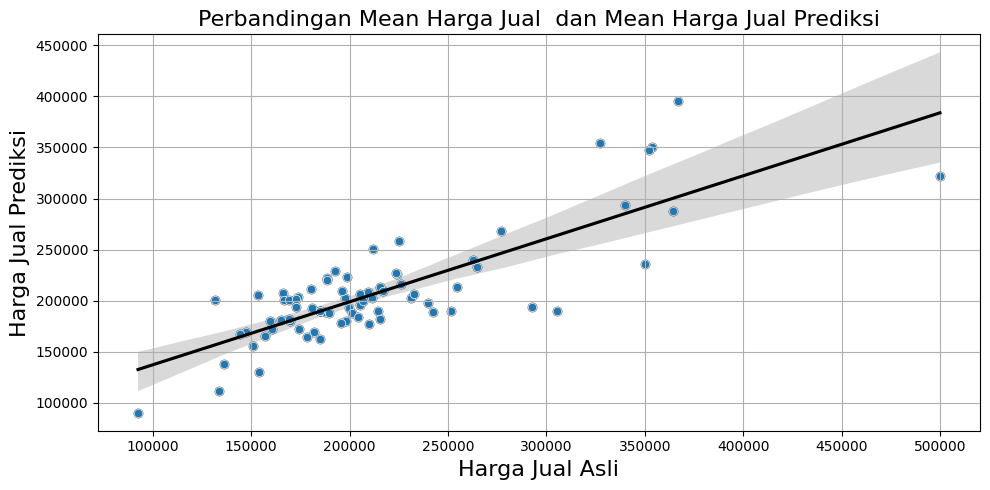

In [ ]:
plt.figure(figsize=(10,5))
sns.regplot(x=y_rule,y=y_rule_pred,color='black')
sns.scatterplot(x=y_rule,y=y_rule_pred)
plt.xlabel('Harga Jual Asli',fontsize=16)
plt.ylabel('Harga Jual Prediksi',fontsize=16)
plt.title('Perbandingan Mean Harga Jual  dan Mean Harga Jual Prediksi',fontsize=16)
plt.grid()
plt.tight_layout()
plt.savefig("pred_vs_rule1.png", dpi=300, bbox_inches='tight')
plt.show()

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>
    Berdasarkan hasil perbandingan mean prediksi harga jual properti California menggunakan <i>machine learning</i> dengan perhitungan sederhana mean harga jual properti secara umum, selisih persentase antara perhitungan mean harga jual properti sederhana dengan mean hasil prediksi harga jual adalah <b>3.04%</b> atau senilai <b>6,502 US Dollar</b>. Persentase ini mengartikan meskipun pemakaian perhitungan sederhana dapat digunakan untuk mendapatkan perkiraan kasar dengan jumlah dataset yang sedikit, akan tetapi model <i>machine learning</i> dapat memberikan keleluasaan dan performa yang lebih baik pada jumlah dataset yang besar dan kompleks
    </p>
    </div>

#### 4.10 Limitasi Model <a name="limitation"></a>

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>
    Model <i>machine learning</i> yang dihasilkan dari analsis ini memiliki limitasi dalam penggunaannya untuk dapat memprediksi dengan baik. Limitasi tersebut adalah:
     <ol>
      <li>Cakupan wilayah yang digunakan hanya pada wilayah di negara bagian California dengan <mark style="background-color: lightgray";>longitude</mark> antara <b>-124.35</b> sampai <b>-114.31</b>, <mark style="background-color: lightgray";>latitude</mark> antara <b>32.54</b> sampai <b>41.95</b>. </li>
      <li>Data yang digunakan merupakan kumpulan data statistik dan sensus pada tahun <b>1990</b>.</li>
      <li>Cakupan data dari fitur numerik <mark style="background-color: lightgray";>housing_median_age</mark> antara <b>1</b> sampai <b>52</b> tahun, <mark style="background-color: lightgray";>total_rooms</mark> antara <b>1</b> sampai <b>5,623</b> kamar, <mark style="background-color: lightgray";>population</mark> antara <b>3</b> sampai <b>2700</b> orang, <mark style="background-color: lightgray";>median_income</mark> antara <b>0.49</b> sampai <b>7.93</b> satuan, dan <mark style="background-color: lightgray";>housing_median_value</mark> antara <b>14,999</b> US Dollar sampai <b>454,400</b> US Dollar.</li>
      <li>Cakupan data dari fitur kategorik <mark style="background-color: lightgray";>ocean_proximity</mark> adalah <mark style="background-color: lightgray";>INLAND</mark>, <mark style="background-color: lightgray";><1H OCEAN</mark>, <mark style="background-color: lightgray";>NEAR OCEAN</mark>, <mark style="background-color: lightgray";>NEAR BAY</mark>, <mark style="background-color: lightgray";>ISLAND</mark>.</li>
      <li>Model <i>machine learning</i> dibangun menggunakan dataset yang hanya memiliki <b>10</b> fitur informasi dan hanya menggunakan <b>6</b> untuk perhitungan regresinya.</li>
      <li>Model <i>machine learning</i> hanya dibangun menggunakan model perhitungan prediksi regresi menggunakan fitur numerik.</li>  
      <li>Model <i>machine learning</i> tidak dapat memprediksi dengan akurat apabila melakukan prediksi diluar dari limitasi model.</li>  
    </ol>
    </p>
    </div>

#### [Kembali ke Daftar Isi](#contents)

### **5. Kesimpulan** <a name="conclusion"></a>

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>Analisis ini telah mengeksplorasi dan memodelkan dataset harga rumah di California untuk mengidentifikasi faktor-faktor yang memengaruhi harga properti dan membangun model prediktif. Berikut adalah kesimpulan utama dari analisis:</p>
    <ol>
      <li>Proporsi data properti pada jarak dari pesisir sesuai urutan adalah  <mark style="background-color: lightgray";><1H OCEAN</mark>  senilai <b>44.6%</b>, <mark style="background-color: lightgray";>INLAND</mark>  senilai <b>31.3%</b>, <mark style="background-color: lightgray";>NEAR OCEAN</mark>  senilai <b>12.9%</b>, dan <mark style="background-color: lightgray";>NEAR BAY</mark>  senilai <b>11.3%</b> </li><br>
      <li>Secara geografis daerah yang berada di pesisir California dan berada di kota besar seperti San Diego, San Francisco, dan Los Angeles memiliki harga jual properti yang tinggi.</li><br>
      <li><p>Korelasi fitur-fitur numerik yang tinggi (melebihi batas <i>threshold</i> <b>0.75</b>) adalah <mark style="background-color: lightgray";>total_rooms</mark>, <mark style="background-color: lightgray";>total_bedrooms</mark>, <mark style="background-color: lightgray";>households</mark>, dan <mark style="background-color: lightgray";>population</mark>. Nilai korelasi tertinggi antar fitur yang dekat pada <i>threshold</i> adalah <b>0.77</b> pada fitur <mark style="background-color: lightgray";>total_rooms</mark> dan <mark style="background-color: lightgray";>population</mark>, sedangkan fitur <mark style="background-color: lightgray";>total_bedrooms</mark> dan <mark style="background-color: lightgray";>households</mark> memiliki korelasi tertinggi senilai <b>0.96</b>.</li><br>
      <li>Performa model-model yang diuji tanpa <i>tuning</i> berdasarkan nilai mean R<sup>2</sup> tertinggi adalah <i>CatBoost</i> Regressor, sedangkan nilai mean R<sup>2</sup> terendah adalah <i>Support Vector Regressor (SVR)</i>.</li><br>
      <li>Hasil evaluasi metrik model setelah optimasi, <i>CatBoost</i> memiliki RMSE senilai <b>45,352</b> US Dollar, MAE senilai <b>30,171</b> US Dollar, MAPE senilai <b>17.02%</b> dan nilai R<sup>2</sup> senilai <b>0.843</b>. Nilai MAPE model ini dapat dikategorikan ke dalam <i>Good forecast</i> (Lewis,1982).</li><br>
      <li>Fitur yang memiliki pengaruh besar pada prediksi harga jual properti California adalah <mark style="background-color: lightgray";>longitude</mark>, <mark style="background-color: lightgray";>latitude</mark> dan <mark style="background-color: lightgray";>median_income</mark> (<b>21-38</b> satuan). Sedangkan <mark style="background-color: lightgray";>housing_median_age</mark>, <mark style="background-color: lightgray";>total_rooms</mark> dan <mark style="background-color: lightgray";>population</mark> memiliki kontribusi yang sedang terhadap prediksi harga jual properti California (<b>5-7</b> satuan).</li><br>
      <li>Selisih persentase antara perhitungan mean harga jual properti sederhana dengan mean hasil prediksi harga jual adalah <b>3.04%</b> atau senilai <b>6,502 US Dollar</b>.</li>
    </ol>
   </div>

### **6. Saran** <a name="recommendation"></a>

<div style="text-align: Jusitify; font-family: 'Helvetica', sans-serif; font-size: 16px;">
    <p>Berdasarkan dari analisis yang telah dilakukan, saran bisnis yang dapat diberikan antara lain:</p>
    <ol>
      <li><b>Targetkan kota-kota pesisir</b>: Fokus pada pengembangan atau investasi properti di kota-kota pesisir utama California. Analisis menunjukkan nilai properti yang lebih tinggi di area ini, yang mengindikasikan permintaan yang kuat dan potensi pengembalian investasi yang tinggi.</li><br>
      <li><b>Pertimbangkan properti yang lebih kecil</b>: Karena nilai properti yang tinggi, pertimbangkan untuk mengembangkan atau berinvestasi di properti yang lebih kecil seperti apartemen atau kondominium untuk melayani lebih banyak pembeli. Dapat juga mempertimbangkan properti yang sedikit lebih jauh ke pedalaman di mana nilai properti lebih rendah.</li><br>
      <li><b>Pertimbangkan fitur-fitur utama</b>: Saat mengevaluasi properti, perhatikan fitur-fitur seperti pendapatan rata-rata di area tersebut, kepadatan penduduk, dan usia properti. Fitur-fitur ini telah terbukti memiliki korelasi yang signifikan dengan nilai properti.</li><br>
      <li><b>Gunakan model prediktif:</b> Manfaatkan model pembelajaran mesin, seperti yang dikembangkan dalam analisis (<i>CatBoost, XGBoost, LightGBM</i>), untuk memprediksi nilai properti secara akurat dan membuat keputusan investasi yang tepat.</li><br>
      <li><b>Tetap terinformasi tentang tren pasar</b>: Memantau pasar properti California untuk mengetahui pergeseran atau perubahan tren terkini. Sesuaikan dengan dataset terbaru agar model dapat menghasilkan prediksi yang relevan dalam menentukan strategi investasi.</li><br>    
    </ol>
   </div>

[Kembali ke Awal](#top)